# Phase 5 Capstone

# Predicting Obesity/ Obesity Prediction

- Student name: Lucas Wilkerson
- Student pace: Flex/part time
- Scheduled project review date/time:
- Instructor name: Morgan Jones

## Business Understanding 

## Data Understanding 

## Data Preparation

## Modeling

## Evaluation

## Deployment

In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [82]:
# Importing standard Packages 
import pandas as pd
import numpy as np
import math 
import zipfile

# Importing packages for visualization 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

# Importing packages for statistics
import statsmodels.api as sm
import sklearn.metrics as metrics
from scipy import stats
from scipy.stats import kstest
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import RocCurveDisplay, confusion_matrix, classification_report, make_scorer
from sklearn.metrics import mean_absolute_error, mean_squared_error, roc_curve, auc
from sklearn.metrics import log_loss, ConfusionMatrixDisplay
#from sklearn.metrics import plot_confusion_matrix, plot_roc_curve
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import (VarianceThreshold, SelectKBest, f_regression, mutual_info_regression, 
    RFE, RFECV)
from xgboost import XGBClassifier, plot_importance
from imblearn.over_sampling import SMOTE


import tensorflow as tf
from keras import datasets, layers, models
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization, Activation
from keras import optimizers 
from keras.optimizers import Adam , SGD, RMSprop
from keras.metrics import Accuracy, Recall
from keras.utils import array_to_img, img_to_array, load_img
from keras import regularizers
from keras.regularizers import l1 , l2 
from keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')

import os


In [3]:
# Function to load dataset 

def load_csv_from_zip(zip_file_path, csv_file_name):
    
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        # Check if the CSV file exists in the zip file
        if csv_file_name in zip_ref.namelist():
            # Read the CSV file directly into a DataFrame
            with zip_ref.open(csv_file_name) as csv_file:
                df = pd.read_csv(csv_file)
                return df
        else:
            print(f"CSV file '{csv_file_name}' not found in the zip file.")
            return None

zip_file_path = "data/brfss2022.csv.zip"
csv_file_name = "brfss2022.csv"
df = load_csv_from_zip(zip_file_path, csv_file_name)
if df is not None:
    print("CSV file loaded successfully!")
    print(df.head())  # Display the first few rows of the DataFrame

CSV file loaded successfully!
   _STATE  FMONTH    IDATE  IMONTH  IDAY  IYEAR  DISPCODE       SEQNO  \
0     1.0     1.0  2032022       2     3   2022    1100.0  2022000001   
1     1.0     1.0  2042022       2     4   2022    1100.0  2022000002   
2     1.0     1.0  2022022       2     2   2022    1100.0  2022000003   
3     1.0     1.0  2032022       2     3   2022    1100.0  2022000004   
4     1.0     1.0  2022022       2     2   2022    1100.0  2022000005   

           _PSU  CTELENM1  ...  _SMOKGRP  _LCSREC  DRNKANY6      DROCDY4_  \
0  2.022000e+09       1.0  ...       4.0      NaN       2.0  5.397605e-79   
1  2.022000e+09       1.0  ...       4.0      NaN       2.0  5.397605e-79   
2  2.022000e+09       1.0  ...       4.0      NaN       2.0  5.397605e-79   
3  2.022000e+09       1.0  ...       3.0      2.0       2.0  5.397605e-79   
4  2.022000e+09       1.0  ...       4.0      NaN       1.0  1.000000e+01   

   _RFBING6      _DRNKWK2  _RFDRHV8  _FLSHOT7  _PNEUMO3  _AIDTST4  


In [4]:
# Display the first few rows to understand the structure of the dataset
print(df.head())

# Loop through the columns to get column names and data types
for column in df.columns:
    print(column, df[column].dtype)

# Get unique values for each column
for column in df.columns:
    print(column, df[column].unique())

   _STATE  FMONTH    IDATE  IMONTH  IDAY  IYEAR  DISPCODE       SEQNO  \
0     1.0     1.0  2032022       2     3   2022    1100.0  2022000001   
1     1.0     1.0  2042022       2     4   2022    1100.0  2022000002   
2     1.0     1.0  2022022       2     2   2022    1100.0  2022000003   
3     1.0     1.0  2032022       2     3   2022    1100.0  2022000004   
4     1.0     1.0  2022022       2     2   2022    1100.0  2022000005   

           _PSU  CTELENM1  ...  _SMOKGRP  _LCSREC  DRNKANY6      DROCDY4_  \
0  2.022000e+09       1.0  ...       4.0      NaN       2.0  5.397605e-79   
1  2.022000e+09       1.0  ...       4.0      NaN       2.0  5.397605e-79   
2  2.022000e+09       1.0  ...       4.0      NaN       2.0  5.397605e-79   
3  2.022000e+09       1.0  ...       3.0      2.0       2.0  5.397605e-79   
4  2.022000e+09       1.0  ...       4.0      NaN       1.0  1.000000e+01   

   _RFBING6      _DRNKWK2  _RFDRHV8  _FLSHOT7  _PNEUMO3  _AIDTST4  
0       1.0  5.397605e-79     

In [5]:
# Previewing df shape
print(df.shape)

#Printing out the total number of rows and columns in the BRFSS dataset
n_rows, n_cols = df.shape
print('The number of rows in the dataset is', n_rows)
print('The number of columns in the dataset is', n_cols)

(445132, 326)
The number of rows in the dataset is 445132
The number of columns in the dataset is 326


In [6]:
# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)


In [7]:
# Previewing general information on dataset
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Columns: 326 entries, _STATE to _AIDTST4
dtypes: float64(321), int64(5)
memory usage: 1.1 GB
None


Looking at the initial dataset information, this dataset contains 445132 entries with a total of 326 columns with datatypes being integers and floats. While there are some numerical columns, a good amount of the columns are categoricla/numerical. The many columns represent  various health-related risk behaviors, chronic health conditions, demographics, location, and even the use of preventive services along with other variables. I plan to narrow down the columns for the dataset, choosing the ones relevant for this analysis. 

In [8]:
#Selecting a subset of relevant columns out of the 326 variables in the data for exploratory analysis----------------------
col_selected = [ #Record Identification/ Demographics----------------------------------------------------------------------
            '_STATE', '_SEX', '_AGEG5YR', '_AGE80', '_AGE_G', 'MARITAL','_EDUCAG', '_INCOMG1', 
            'VETERAN3', 'EMPLOY1', '_CHLDCNT', '_METSTAT', '_URBSTAT', '_IMPRACE', '_RACE1', '_RACEPR1', '_HISPANC', 
                #Health Status/ Metrics------------------------------------------------------------------------------------
            '_BMI5', 'GENHLTH', '_RFHLTH','PHYSHLTH', '_PHYS14D',
            'MENTHLTH', '_MENT14D', 'EXERANY2', '_TOTINDA', 'SLEPTIM1', 
            '_HLTHPLN', 'PERSDOC3', 'CHECKUP1', 'ADDEPEV3', 'HAVARTH4', '_DRDXAR2', '_MICHD',  
            'DIABETE4', 'DECIDE',  
                #Tobacco use-----------------------------------------------------------------------------------------------
            '_SMOKER3','SMOKE100', 'USENOW3', 'ECIGNOW2', '_CURECI2', 
                #Alcohol consumption---------------------------------------------------------------------------------------
            'DRNKANY6', '_RFBING6', '_DRNKWK2']


In [9]:
# Creating dataset of selected variables 
df_subset = df[col_selected].copy()
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 44 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   _STATE    445132 non-null  float64
 1   _SEX      445132 non-null  float64
 2   _AGEG5YR  445132 non-null  float64
 3   _AGE80    445132 non-null  float64
 4   _AGE_G    445132 non-null  float64
 5   MARITAL   445124 non-null  float64
 6   _EDUCAG   445132 non-null  float64
 7   _INCOMG1  445132 non-null  float64
 8   VETERAN3  440959 non-null  float64
 9   EMPLOY1   438936 non-null  float64
 10  _CHLDCNT  445131 non-null  float64
 11  _METSTAT  435724 non-null  float64
 12  _URBSTAT  435724 non-null  float64
 13  _IMPRACE  445132 non-null  float64
 14  _RACE1    445130 non-null  float64
 15  _RACEPR1  445132 non-null  float64
 16  _HISPANC  445132 non-null  float64
 17  _BMI5     396326 non-null  float64
 18  GENHLTH   445129 non-null  float64
 19  _RFHLTH   445132 non-null  float64
 20  PHYS

In [10]:
#Previewing first 10 rows 
df_subset.head(10)


,_STATE,_SEX,_AGEG5YR,_AGE80,_AGE_G,MARITAL,_EDUCAG,_INCOMG1,VETERAN3,EMPLOY1,_CHLDCNT,_METSTAT,_URBSTAT,_IMPRACE,_RACE1,_RACEPR1,_HISPANC,_BMI5,GENHLTH,_RFHLTH,PHYSHLTH,_PHYS14D,MENTHLTH,_MENT14D,EXERANY2,_TOTINDA,SLEPTIM1,_HLTHPLN,PERSDOC3,CHECKUP1,ADDEPEV3,HAVARTH4,_DRDXAR2,_MICHD,DIABETE4,DECIDE,_SMOKER3,SMOKE100,USENOW3,ECIGNOW2,_CURECI2,DRNKANY6,_RFBING6,_DRNKWK2
0,1.0,2.0,13.0,80.0,6.0,1.0,4.0,9.0,2.0,7.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,NaN,2.0,1.0,88.0,1.0,88.0,1.0,2.0,2.0,8.0,9.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,4.0,2.0,3.0,4.0,1.0,2.0,1.0,5.397605e-79
1,1.0,2.0,13.0,80.0,6.0,3.0,2.0,3.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,2657.0,1.0,1.0,88.0,1.0,88.0,1.0,2.0,2.0,6.0,1.0,2.0,8.0,2.0,2.0,2.0,2.0,3.0,2.0,4.0,2.0,3.0,1.0,1.0,2.0,1.0,5.397605e-79
2,1.0,2.0,8.0,56.0,5.0,1.0,4.0,6.0,2.0,7.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2561.0,2.0,1.0,2.0,2.0,3.0,2.0,1.0,1.0,5.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,2.0,4.0,2.0,3.0,1.0,1.0,2.0,1.0,5.397605e-79
3,1.0,2.0,14.0,73.0,6.0,1.0,2.0,9.0,2.0,7.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2330.0,1.0,1.0,88.0,1.0,88.0,1.0,1.0,1.0,7.0,9.0,1.0,1.0,2.0,1.0,1.0,2.0,3.0,2.0,2.0,1.0,3.0,1.0,1.0,2.0,1.0,5.397605e-79
4,1.0,2.0,5.0,43.0,3.0,1.0,3.0,3.0,2.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2177.0,4.0,2.0,2.0,2.0,88.0,1.0,1.0,1.0,9.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,3.0,2.0,4.0,2.0,3.0,1.0,1.0,1.0,1.0,1.400000e+02
5,1.0,1.0,13.0,80.0,6.0,1.0,2.0,9.0,2.0,7.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2608.0,5.0,2.0,1.0,2.0,88.0,1.0,2.0,2.0,7.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,4.0,2.0,3.0,1.0,1.0,2.0,1.0,5.397605e-79
6,1.0,2.0,13.0,80.0,6.0,2.0,4.0,5.0,2.0,7.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2296.0,2.0,1.0,88.0,1.0,88.0,1.0,1.0,1.0,7.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,2.0,3.0,1.0,3.0,1.0,1.0,1.0,1.0,2.330000e+02
7,1.0,2.0,13.0,80.0,6.0,3.0,2.0,5.0,2.0,7.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2781.0,3.0,1.0,88.0,1.0,88.0,1.0,2.0,2.0,8.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,3.0,2.0,4.0,2.0,3.0,1.0,1.0,2.0,1.0,5.397605e-79
8,1.0,2.0,12.0,78.0,6.0,1.0,4.0,5.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,NaN,3.0,1.0,88.0,1.0,88.0,1.0,1.0,1.0,6.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,3.0,2.0,3.0,1.0,3.0,4.0,1.0,2.0,1.0,5.397605e-79
9,1.0,2.0,11.0,72.0,6.0,1.0,4.0,5.0,2.0,7.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,2905.0,3.0,1.0,1.0,2.0,88.0,1.0,1.0,1.0,7.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,4.0,2.0,3.0,1.0,1.0,1.0,1.0,2.300000e+01


In [11]:
#Computing percent missing values in each column in the dataset

percent_missing = ((df_subset.isnull() | df_subset.isna()).sum() * 100 / df_subset.index.size).round(2)
missing_value_df = pd.DataFrame({'column_name': df_subset.columns,
                                 'percent_missing': percent_missing})

In [12]:
missing_value_df

,column_name,percent_missing
_STATE,_STATE,0.00
_SEX,_SEX,0.00
_AGEG5YR,_AGEG5YR,0.00
_AGE80,_AGE80,0.00
_AGE_G,_AGE_G,0.00
MARITAL,MARITAL,0.00
_EDUCAG,_EDUCAG,0.00
_INCOMG1,_INCOMG1,0.00
VETERAN3,VETERAN3,0.94
EMPLOY1,EMPLOY1,1.39


In [13]:
#Inspecting unique values and value counts for all variables
for col in df_subset:
    print(f"{col} - unique values: ")
    print(df_subset[col].unique(), "\n")
    print("------------------------------------")

_STATE - unique values: 
[ 1.  2.  4.  5.  6.  8.  9. 10. 11. 12. 13. 15. 16. 17. 18. 19. 20. 21.
 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36. 37. 38. 39.
 40. 41. 42. 44. 45. 46. 47. 48. 49. 50. 51. 53. 54. 55. 56. 66. 72. 78.] 

------------------------------------
_SEX - unique values: 
[2. 1.] 

------------------------------------
_AGEG5YR - unique values: 
[13.  8. 14.  5. 12. 11. 10.  9.  7.  6.  4.  2.  3.  1.] 

------------------------------------
_AGE80 - unique values: 
[80. 56. 73. 43. 78. 72. 57. 65. 70. 62. 63. 67. 79. 68. 66. 76. 74. 51.
 71. 61. 64. 60. 52. 69. 46. 58. 38. 77. 59. 54. 75. 35. 55. 45. 44. 50.
 47. 53. 40. 49. 28. 30. 48. 41. 42. 36. 31. 33. 27. 26. 29. 34. 20. 19.
 37. 25. 32. 18. 24. 23. 39. 22. 21.] 

------------------------------------
_AGE_G - unique values: 
[6. 5. 3. 4. 2. 1.] 

------------------------------------
MARITAL - unique values: 
[ 1.  3.  2.  4.  5.  6.  9. nan] 

------------------------------------
_EDUCAG - unique v

In [14]:
# checking for null
pd.set_option('display.max_rows', 500)
print(df_subset.isna().sum())

_STATE          0
_SEX            0
_AGEG5YR        0
_AGE80          0
_AGE_G          0
MARITAL         8
_EDUCAG         0
_INCOMG1        0
VETERAN3     4173
EMPLOY1      6196
_CHLDCNT        1
_METSTAT     9408
_URBSTAT     9408
_IMPRACE        0
_RACE1          2
_RACEPR1        0
_HISPANC        0
_BMI5       48806
GENHLTH         3
_RFHLTH         0
PHYSHLTH        5
_PHYS14D        0
MENTHLTH        3
_MENT14D        0
EXERANY2        2
_TOTINDA        0
SLEPTIM1        3
_HLTHPLN        0
PERSDOC3        2
CHECKUP1        3
ADDEPEV3        7
HAVARTH4        3
_DRDXAR2     2633
_MICHD       5021
DIABETE4        3
DECIDE      20986
_SMOKER3        0
SMOKE100    31777
USENOW3     32600
ECIGNOW2    33579
_CURECI2        0
DRNKANY6        0
_RFBING6        0
_DRNKWK2        0
dtype: int64


In [15]:
#Checking duplicates count

df_subset.duplicated().sum()


12

In [16]:
# Dropping duplicate rows
df_subset.drop_duplicates(inplace=True)
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 445120 entries, 0 to 445131
Data columns (total 44 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   _STATE    445120 non-null  float64
 1   _SEX      445120 non-null  float64
 2   _AGEG5YR  445120 non-null  float64
 3   _AGE80    445120 non-null  float64
 4   _AGE_G    445120 non-null  float64
 5   MARITAL   445112 non-null  float64
 6   _EDUCAG   445120 non-null  float64
 7   _INCOMG1  445120 non-null  float64
 8   VETERAN3  440949 non-null  float64
 9   EMPLOY1   438926 non-null  float64
 10  _CHLDCNT  445119 non-null  float64
 11  _METSTAT  435712 non-null  float64
 12  _URBSTAT  435712 non-null  float64
 13  _IMPRACE  445120 non-null  float64
 14  _RACE1    445118 non-null  float64
 15  _RACEPR1  445120 non-null  float64
 16  _HISPANC  445120 non-null  float64
 17  _BMI5     396318 non-null  float64
 18  GENHLTH   445117 non-null  float64
 19  _RFHLTH   445120 non-null  float64
 20  PHYSHLTH 

In [17]:
# Imputing mean for missing BMI values 
from sklearn.impute import SimpleImputer

# Reshape the input data to a 2D array
X_train_2d = df_subset['_BMI5'].values.reshape(-1, 1)

# Initialize the SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Fit and transform the data
df_subset['_BMI5'] = imputer.fit_transform(X_train_2d)

In [18]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 445120 entries, 0 to 445131
Data columns (total 44 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   _STATE    445120 non-null  float64
 1   _SEX      445120 non-null  float64
 2   _AGEG5YR  445120 non-null  float64
 3   _AGE80    445120 non-null  float64
 4   _AGE_G    445120 non-null  float64
 5   MARITAL   445112 non-null  float64
 6   _EDUCAG   445120 non-null  float64
 7   _INCOMG1  445120 non-null  float64
 8   VETERAN3  440949 non-null  float64
 9   EMPLOY1   438926 non-null  float64
 10  _CHLDCNT  445119 non-null  float64
 11  _METSTAT  435712 non-null  float64
 12  _URBSTAT  435712 non-null  float64
 13  _IMPRACE  445120 non-null  float64
 14  _RACE1    445118 non-null  float64
 15  _RACEPR1  445120 non-null  float64
 16  _HISPANC  445120 non-null  float64
 17  _BMI5     445120 non-null  float64
 18  GENHLTH   445117 non-null  float64
 19  _RFHLTH   445120 non-null  float64
 20  PHYSHLTH 

In [19]:
# checking for null
pd.set_option('display.max_rows', 500)
print(df_subset.isna().sum())

_STATE          0
_SEX            0
_AGEG5YR        0
_AGE80          0
_AGE_G          0
MARITAL         8
_EDUCAG         0
_INCOMG1        0
VETERAN3     4171
EMPLOY1      6194
_CHLDCNT        1
_METSTAT     9408
_URBSTAT     9408
_IMPRACE        0
_RACE1          2
_RACEPR1        0
_HISPANC        0
_BMI5           0
GENHLTH         3
_RFHLTH         0
PHYSHLTH        5
_PHYS14D        0
MENTHLTH        3
_MENT14D        0
EXERANY2        2
_TOTINDA        0
SLEPTIM1        3
_HLTHPLN        0
PERSDOC3        2
CHECKUP1        3
ADDEPEV3        7
HAVARTH4        3
_DRDXAR2     2631
_MICHD       5019
DIABETE4        3
DECIDE      20984
_SMOKER3        0
SMOKE100    31775
USENOW3     32598
ECIGNOW2    33577
_CURECI2        0
DRNKANY6        0
_RFBING6        0
_DRNKWK2        0
dtype: int64


In [20]:
# Fill missing values with median
for column in df_subset:
    # Calculate median excluding NaN values
    median_value = df_subset[column].median()
    # Fill NaN values with median
    df_subset[column].fillna(median_value, inplace=True)

In [21]:
# Previewing for null values 
print(df_subset.info())

<class 'pandas.core.frame.DataFrame'>
Index: 445120 entries, 0 to 445131
Data columns (total 44 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   _STATE    445120 non-null  float64
 1   _SEX      445120 non-null  float64
 2   _AGEG5YR  445120 non-null  float64
 3   _AGE80    445120 non-null  float64
 4   _AGE_G    445120 non-null  float64
 5   MARITAL   445120 non-null  float64
 6   _EDUCAG   445120 non-null  float64
 7   _INCOMG1  445120 non-null  float64
 8   VETERAN3  445120 non-null  float64
 9   EMPLOY1   445120 non-null  float64
 10  _CHLDCNT  445120 non-null  float64
 11  _METSTAT  445120 non-null  float64
 12  _URBSTAT  445120 non-null  float64
 13  _IMPRACE  445120 non-null  float64
 14  _RACE1    445120 non-null  float64
 15  _RACEPR1  445120 non-null  float64
 16  _HISPANC  445120 non-null  float64
 17  _BMI5     445120 non-null  float64
 18  GENHLTH   445120 non-null  float64
 19  _RFHLTH   445120 non-null  float64
 20  PHYSHLTH 

Upon inspection of the codebook for the variables, certain variables will have placeholder values such as 9 or 99 and others. I plan to go through the vairables and element these placeholders values that are being used for missing values. 

In [22]:
# Making copy of df 
# Dropping entries with placeholder values that are equal to 7777.0, 9999.0, 
# 77.0, 99.0, 9.0 as those are zero placeholders for certain columns 
df_copy = df_subset.copy()

# Dropping additional entries with placeholder values 
df_copy = df_copy[df_copy["_DRNKWK2"] != 99900.0]
df_copy = df_copy[df_copy["MENTHLTH"] != 77.0]
df_copy = df_copy[df_copy["MENTHLTH"] != 99.0]
df_copy = df_copy[df_copy["PHYSHLTH"] != 77.0]
df_copy = df_copy[df_copy["PHYSHLTH"] != 99.0]
df_copy = df_copy[df_copy["_HLTHPLN"] != 9.0]
df_copy = df_copy[df_copy["_RFHLTH"] != 9.0]

df_copy = df_copy[df_copy["_PHYS14D"] != 9.0]
df_copy = df_copy[df_copy["_MENT14D"] != 9.0]
df_copy = df_copy[df_copy["HAVARTH4"] != 7.0]
df_copy = df_copy[df_copy["HAVARTH4"] != 9.0]



# Dropping the rest of the placeholder values in columns
df_copy = df_copy[df_copy['_AGEG5YR'] != 14.0]
df_copy = df_copy[df_copy['MARITAL'] != 9.0]
df_copy = df_copy[df_copy['_EDUCAG'] != 9.0]
df_copy = df_copy[df_copy['_INCOMG1'] != 9.0]
df_copy = df_copy[df_copy["VETERAN3"] != 9.0]
df_copy = df_copy[df_copy["VETERAN3"] != 7.0]
df_copy = df_copy[df_copy["EMPLOY1"] != 9.0]
df_copy = df_copy[df_copy["_CHLDCNT"] != 9.0]
df_copy = df_copy[df_copy["_RACE1"] != 9.0]
df_copy = df_copy[df_copy["_HISPANC"] != 9.0]
df_copy = df_copy[df_copy["GENHLTH"] != 9.0]
df_copy = df_copy[df_copy["EXERANY2"] != 9.0]
df_copy = df_copy[df_copy["_TOTINDA"] != 9.0]
df_copy = df_copy[df_copy["SLEPTIM1"] != 77.0]
df_copy = df_copy[df_copy["SLEPTIM1"] != 99.0]
df_copy = df_copy[df_copy["PERSDOC3"] != 7.0]
df_copy = df_copy[df_copy["PERSDOC3"] != 9.0]
df_copy = df_copy[df_copy["CHECKUP1"] != 7.0]
df_copy = df_copy[df_copy["CHECKUP1"] != 9.0]
df_copy = df_copy[df_copy["ADDEPEV3"] != 7.0]
df_copy = df_copy[df_copy["ADDEPEV3"] != 9.0]
df_copy = df_copy[df_copy["DIABETE4"] != 7.0]
df_copy = df_copy[df_copy["DIABETE4"] != 9.0]
df_copy = df_copy[df_copy["DECIDE"] != 7.0]
df_copy = df_copy[df_copy["DECIDE"] != 9.0]
df_copy = df_copy[df_copy["_SMOKER3"] != 9.0]
df_copy = df_copy[df_copy["SMOKE100"] != 7.0]
df_copy = df_copy[df_copy["SMOKE100"] != 9.0]
df_copy = df_copy[df_copy["USENOW3"] != 7.0]
df_copy = df_copy[df_copy["USENOW3"] != 9.0]
df_copy = df_copy[df_copy["ECIGNOW2"] != 7.0]
df_copy = df_copy[df_copy["ECIGNOW2"] != 9.0]
df_copy = df_copy[df_copy["_CURECI2"] != 9.0]
df_copy = df_copy[df_copy["_RFBING6"] != 9.0]
df_copy = df_copy[df_copy["_DRNKWK2"] != 99900.0]



df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283957 entries, 1 to 445130
Data columns (total 44 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   _STATE    283957 non-null  float64
 1   _SEX      283957 non-null  float64
 2   _AGEG5YR  283957 non-null  float64
 3   _AGE80    283957 non-null  float64
 4   _AGE_G    283957 non-null  float64
 5   MARITAL   283957 non-null  float64
 6   _EDUCAG   283957 non-null  float64
 7   _INCOMG1  283957 non-null  float64
 8   VETERAN3  283957 non-null  float64
 9   EMPLOY1   283957 non-null  float64
 10  _CHLDCNT  283957 non-null  float64
 11  _METSTAT  283957 non-null  float64
 12  _URBSTAT  283957 non-null  float64
 13  _IMPRACE  283957 non-null  float64
 14  _RACE1    283957 non-null  float64
 15  _RACEPR1  283957 non-null  float64
 16  _HISPANC  283957 non-null  float64
 17  _BMI5     283957 non-null  float64
 18  GENHLTH   283957 non-null  float64
 19  _RFHLTH   283957 non-null  float64
 20  PHYSHLTH 

In [23]:
#Inspecting unique values and value counts for all variables
for col in df_copy:
    print(f"{col} - unique values: ")
    print(df_copy[col].unique(), "\n")
    print("------------------------------------")

_STATE - unique values: 
[ 1.  2.  4.  5.  6.  8.  9. 10. 11. 12. 13. 15. 16. 17. 18. 19. 20. 21.
 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36. 37. 38. 39.
 40. 41. 42. 44. 45. 46. 47. 48. 49. 50. 51. 53. 54. 55. 56. 66. 72. 78.] 

------------------------------------
_SEX - unique values: 
[2. 1.] 

------------------------------------
_AGEG5YR - unique values: 
[13.  8.  5. 12. 11. 10.  9.  7.  6.  4.  3.  2.  1.] 

------------------------------------
_AGE80 - unique values: 
[80. 56. 43. 78. 72. 57. 65. 63. 79. 68. 73. 76. 74. 51. 71. 61. 60. 70.
 52. 62. 67. 46. 64. 66. 69. 38. 77. 54. 35. 55. 45. 75. 59. 44. 58. 50.
 47. 53. 40. 49. 41. 42. 48. 31. 36. 27. 30. 26. 29. 34. 20. 37. 33. 32.
 28. 25. 24. 39. 22. 21. 23. 19. 18.] 

------------------------------------
_AGE_G - unique values: 
[6. 5. 3. 4. 2. 1.] 

------------------------------------
MARITAL - unique values: 
[3. 1. 2. 4. 5. 6.] 

------------------------------------
_EDUCAG - unique values: 
[2. 4. 3. 

In [24]:
# Define a threshold for obesity and for overweight 
obesity_threshold = 30.0  # BMI greater than or equal to 30 is considered obese
overweight_threshold = 25.0  # BMI greater than or equal to 25 is considered overweight 

# Create a new column indicating whether each BMI value is obese or not
df_copy['Obese'] = (df_copy["_BMI5"] * 0.01) >= obesity_threshold
df_copy['Overweight'] = (df_copy["_BMI5"] * 0.01) >= overweight_threshold

# Convert boolean values to binary (1 for obese, 0 for not obese)
df_copy['Obese'] = df_copy['Obese'].astype(int)
df_copy['Overweight'] = df_copy['Overweight'].astype(int)

print(df_copy)

        _STATE  _SEX  _AGEG5YR  _AGE80  _AGE_G  MARITAL  _EDUCAG  _INCOMG1  \
1          1.0   2.0      13.0    80.0     6.0      3.0      2.0       3.0   
2          1.0   2.0       8.0    56.0     5.0      1.0      4.0       6.0   
4          1.0   2.0       5.0    43.0     3.0      1.0      3.0       3.0   
6          1.0   2.0      13.0    80.0     6.0      2.0      4.0       5.0   
7          1.0   2.0      13.0    80.0     6.0      3.0      2.0       5.0   
...        ...   ...       ...     ...     ...      ...      ...       ...   
445123    78.0   2.0       2.0    29.0     2.0      5.0      4.0       2.0   
445124    78.0   1.0      10.0    68.0     6.0      1.0      4.0       6.0   
445126    78.0   1.0       3.0    34.0     2.0      5.0      4.0       5.0   
445128    78.0   2.0       7.0    51.0     4.0      1.0      4.0       5.0   
445130    78.0   1.0      11.0    73.0     6.0      1.0      3.0       5.0   

        VETERAN3  EMPLOY1  _CHLDCNT  _METSTAT  _URBSTAT  _IMPRA

In [25]:
# Creating final clean dataset
df_clean = df_copy.copy()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283957 entries, 1 to 445130
Data columns (total 46 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   _STATE      283957 non-null  float64
 1   _SEX        283957 non-null  float64
 2   _AGEG5YR    283957 non-null  float64
 3   _AGE80      283957 non-null  float64
 4   _AGE_G      283957 non-null  float64
 5   MARITAL     283957 non-null  float64
 6   _EDUCAG     283957 non-null  float64
 7   _INCOMG1    283957 non-null  float64
 8   VETERAN3    283957 non-null  float64
 9   EMPLOY1     283957 non-null  float64
 10  _CHLDCNT    283957 non-null  float64
 11  _METSTAT    283957 non-null  float64
 12  _URBSTAT    283957 non-null  float64
 13  _IMPRACE    283957 non-null  float64
 14  _RACE1      283957 non-null  float64
 15  _RACEPR1    283957 non-null  float64
 16  _HISPANC    283957 non-null  float64
 17  _BMI5       283957 non-null  float64
 18  GENHLTH     283957 non-null  float64
 19  _RFHLTH

The final cleaned dataset has 283,957 entries with 45 columns, The target variable for analysis is whether an individual has obesity or not. A new column ("Obese") was created for this variable. A column for the BMI catergory "Overweight" has also been created.

# Dataset now final 

In [26]:
# Generating basic descriptive statistics of the numerica variables of the dataset 
df_clean.describe()

,_STATE,_SEX,_AGEG5YR,_AGE80,_AGE_G,MARITAL,_EDUCAG,_INCOMG1,VETERAN3,EMPLOY1,_CHLDCNT,_METSTAT,_URBSTAT,_IMPRACE,_RACE1,_RACEPR1,_HISPANC,_BMI5,GENHLTH,_RFHLTH,PHYSHLTH,_PHYS14D,MENTHLTH,_MENT14D,EXERANY2,_TOTINDA,SLEPTIM1,_HLTHPLN,PERSDOC3,CHECKUP1,ADDEPEV3,HAVARTH4,_DRDXAR2,_MICHD,DIABETE4,DECIDE,_SMOKER3,SMOKE100,USENOW3,ECIGNOW2,_CURECI2,DRNKANY6,_RFBING6,_DRNKWK2,Obese,Overweight
count,283957.000000,283957.000000,283957.000000,283957.000000,283957.000000,283957.000000,283957.000000,283957.000000,283957.000000,283957.000000,283957.000000,283957.000000,283957.000000,283957.000000,283957.000000,283957.000000,283957.000000,283957.000000,283957.000000,283957.000000,283957.000000,283957.000000,283957.000000,283957.000000,283957.000000,283957.000000,283957.000000,283957.000000,283957.000000,283957.000000,283957.000000,283957.000000,283957.000000,283957.000000,283957.000000,283957.000000,283957.000000,283957.000000,283957.000000,283957.000000,283957.000000,283957.000000,283957.000000,2.839570e+05,283957.000000,283957.000000
mean,31.162299,1.522199,7.573150,54.676314,4.378501,2.277257,3.140521,4.508471,1.874055,3.615248,1.504964,1.269270,1.125575,1.685576,1.990418,1.876249,1.908454,2876.332541,2.525611,1.165529,58.095215,1.515472,56.701391,1.539814,1.223668,1.223668,7.009209,1.046465,1.545576,1.371553,1.784376,1.656198,1.656198,1.912342,2.738777,1.890255,3.391056,1.597788,2.950887,1.618830,1.052434,1.446606,1.154893,3.152105e+02,0.334966,0.717225
std,16.690667,0.499508,3.461674,17.169595,1.573554,1.688487,0.916991,1.596035,0.331788,2.845945,0.984963,0.443581,0.331371,1.424338,2.191551,1.891311,0.288384,639.455153,1.030362,0.371658,38.163872,0.710915,38.459964,0.719820,0.416703,0.416703,1.431894,0.210490,0.693797,0.893319,0.411255,0.474977,0.474977,0.282797,0.716167,0.312573,0.908596,0.490345,0.288798,1.169904,0.222901,0.497142,0.361803,8.595962e+02,0.471979,0.450349
min,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1205.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.397605e-79,0.000000,0.000000
25%,18.000000,1.000000,5.000000,41.000000,3.000000,1.000000,2.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2441.000000,2.000000,1.000000,10.000000,1.000000,10.000000,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,3.000000,2.000000,3.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,5.397605e-79,0.000000,0.000000
50%,30.000000,2.000000,8.000000,57.000000,5.000000,1.000000,3.000000,5.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2799.000000,2.000000,1.000000,88.000000,1.000000,88.000000,1.000000,1.000000,1.000000,7.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,4.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,2.300000e+01,0.000000,1.000000
75%,46.000000,2.000000,10.000000,69.000000,6.000000,3.000000,4.000000,6.000000,2.000000,7.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3175.000000,3.000000,1.000000,88.000000,2.000000,88.000000,2.000000,1.000000,1.000000,8.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,4.000000,2.000000,3.000000,1.000000,1.000000,2.000000,1.000000,3.000000e+02,1.000000,1.000000
max,78.000000,2.000000,13.000000,80.000000,6.000000,6.000000,4.000000,7.000000,2.000000,8.000000,6.000000,2.000000,2.000000,6.000000,8.000000,7.000000,2.000000,9765.000000,5.000000,2.000000,88.000000,3.000000,88.000000,3.000000,2.000000,2.000000,24.000000,2.000000,3.000000,8.000000,2.000000,2.000000,2.000000,2.000000,4.000000,2.000000,4.000000,2.000000,3.000000,4.000000,2.000000,2.000000

# Visualization


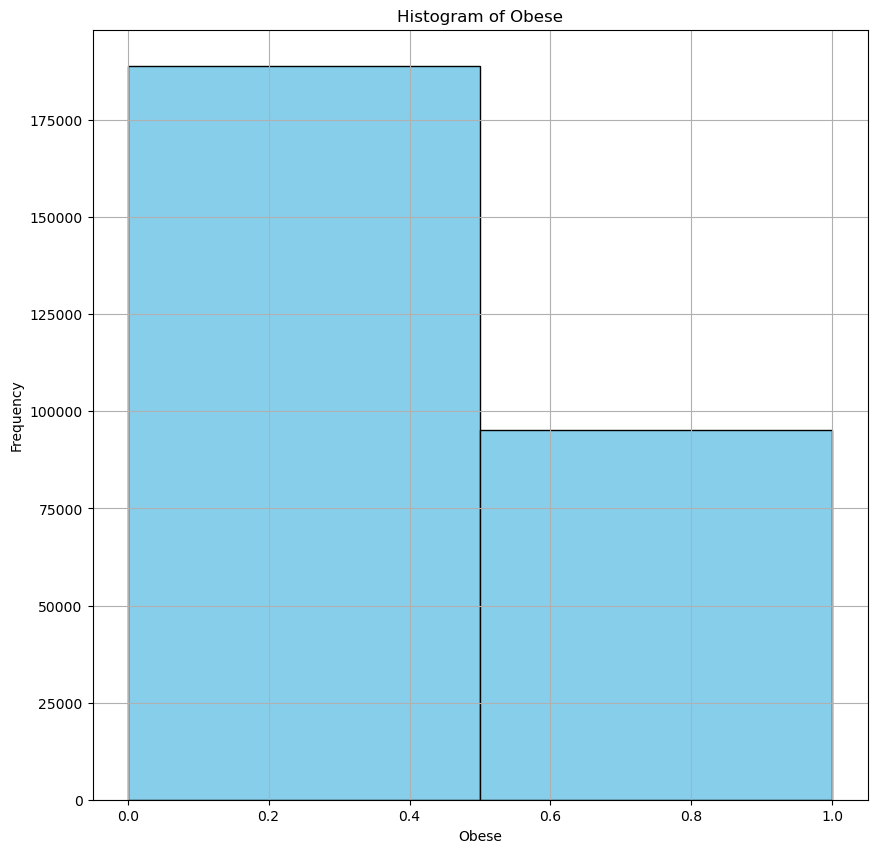

In [27]:
# Plotting Distributions for Exercise

import matplotlib.pyplot as plt

column_name = 'Obese'

# Plot histogram
plt.figure(figsize=(10, 10))
plt.hist((df_clean[column_name]), bins=2, color='skyblue', edgecolor='black')
plt.title('Histogram of ' + column_name)
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [28]:
print('Raw counts: \n')
print(df_clean['Obese'].value_counts())
print('-----------------------------------')
print('Normalized counts: \n')
print(df_clean['Obese'].value_counts(normalize=True))

Raw counts: 

Obese
0    188841
1     95116
Name: count, dtype: int64
-----------------------------------
Normalized counts: 

Obese
0    0.665034
1    0.334966
Name: proportion, dtype: float64


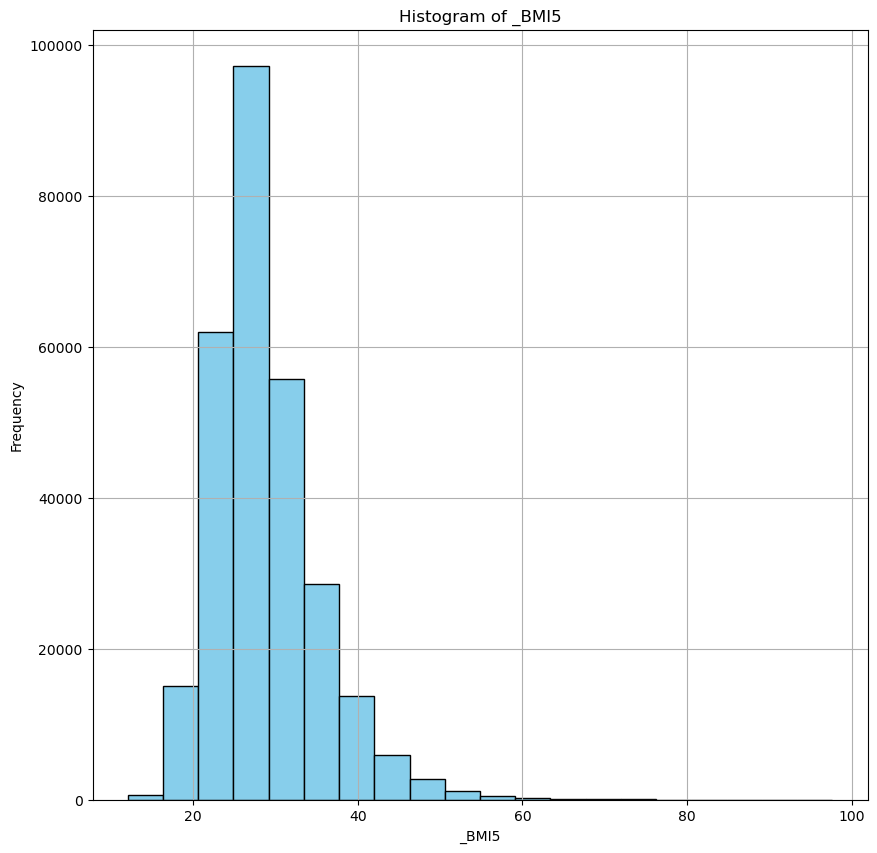

In [29]:
# Plotting Distributions for BMI

import matplotlib.pyplot as plt

column_name = '_BMI5'

# Plot histogram
plt.figure(figsize=(10, 10))
plt.hist((df_clean[column_name] * 0.01), bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of ' + column_name)
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

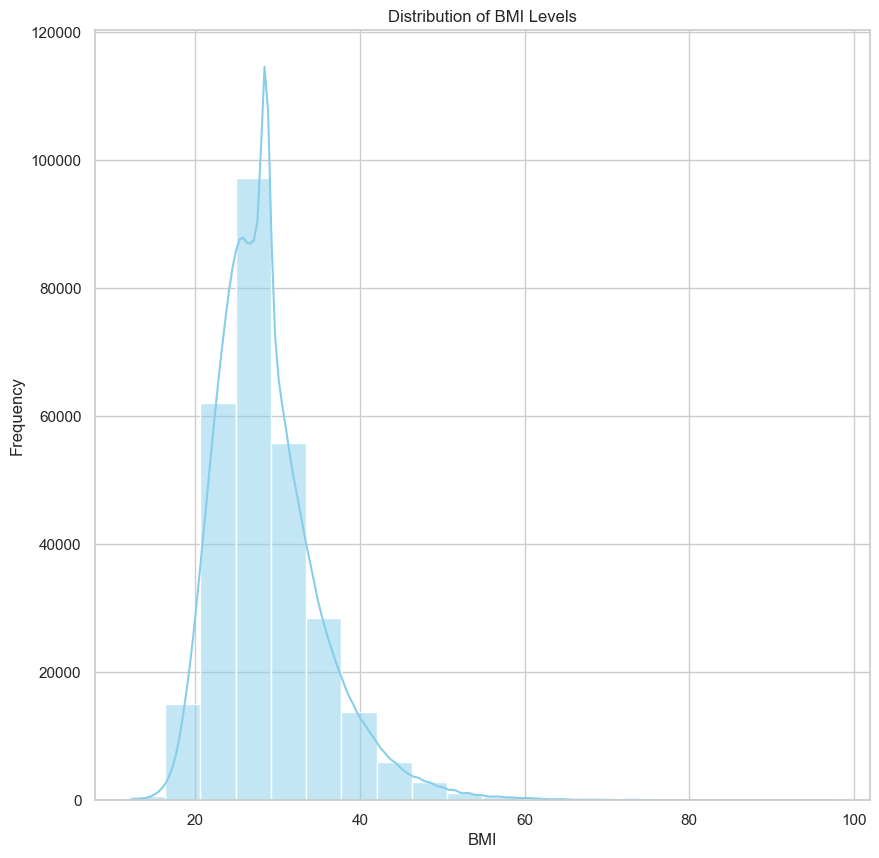

In [30]:
#Plotting a histogram to check the distribution of BMI values

sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(10, 10))
sns.histplot(data= (df_clean['_BMI5'] *.01), kde=True, color='skyblue', bins=20)

# Adding title and labels 
plt.title('Distribution of BMI Levels')
plt.xlabel('BMI')
plt.ylabel('Frequency')

plt.show()

Upon observation of the distribution, it does seem to be skewed to the right. The majority of values seem to be between BMI values of 20 to 40. To be classified as overweight BMI has to be 25.0 or over and to be classified as obese BMI has to be 30.0 or over. 

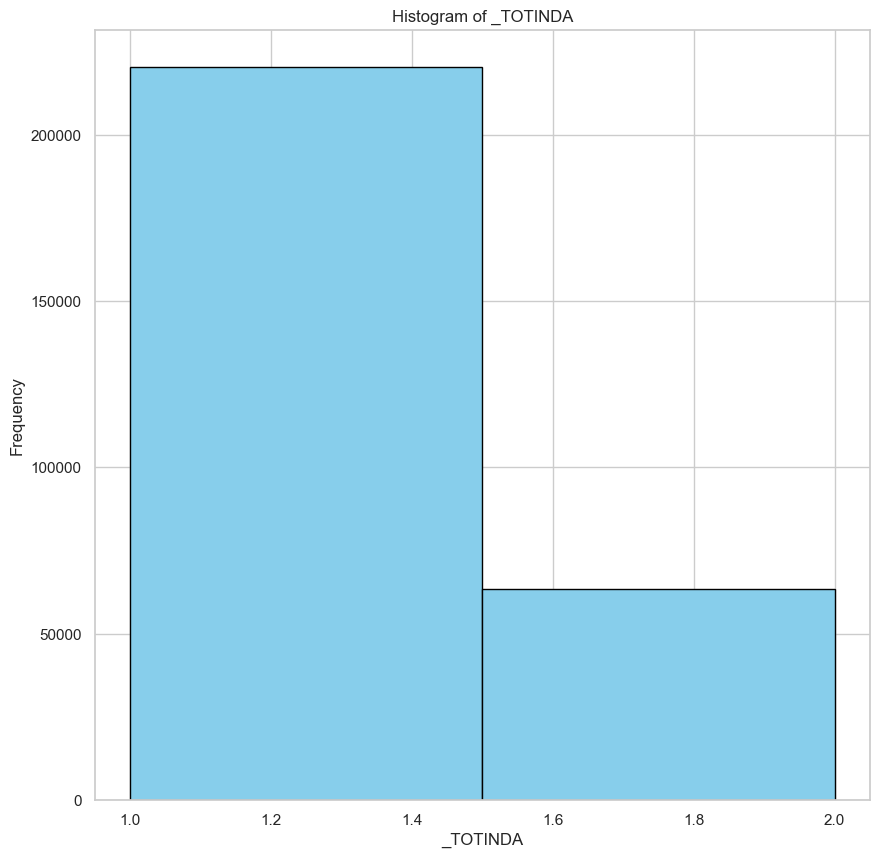

In [31]:
# Plotting Distributions for Exercise

import matplotlib.pyplot as plt

column_name = '_TOTINDA'

# Plot histogram
plt.figure(figsize=(10, 10))
plt.hist((df_clean[column_name]), bins=2, color='skyblue', edgecolor='black')
plt.title('Histogram of ' + column_name)
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [32]:
print('Raw counts: \n')
print(df_clean['_TOTINDA'].value_counts())
print('-----------------------------------')
print('Normalized counts: \n')
print(df_clean['_TOTINDA'].value_counts(normalize=True))

Raw counts: 

_TOTINDA
1.0    220445
2.0     63512
Name: count, dtype: int64
-----------------------------------
Normalized counts: 

_TOTINDA
1.0    0.776332
2.0    0.223668
Name: proportion, dtype: float64


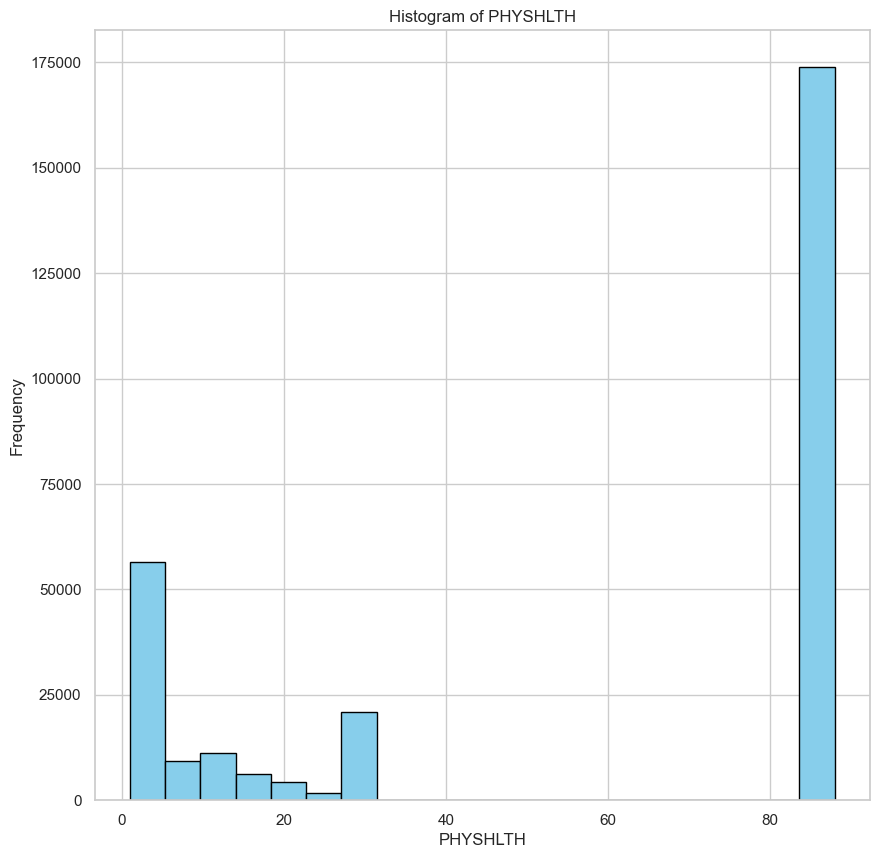

In [33]:
# Plotting Distributions for Physical health status

import matplotlib.pyplot as plt

column_name = 'PHYSHLTH'

# Plot histogram
plt.figure(figsize=(10, 10))
plt.hist((df_clean[column_name]), bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of ' + column_name)
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

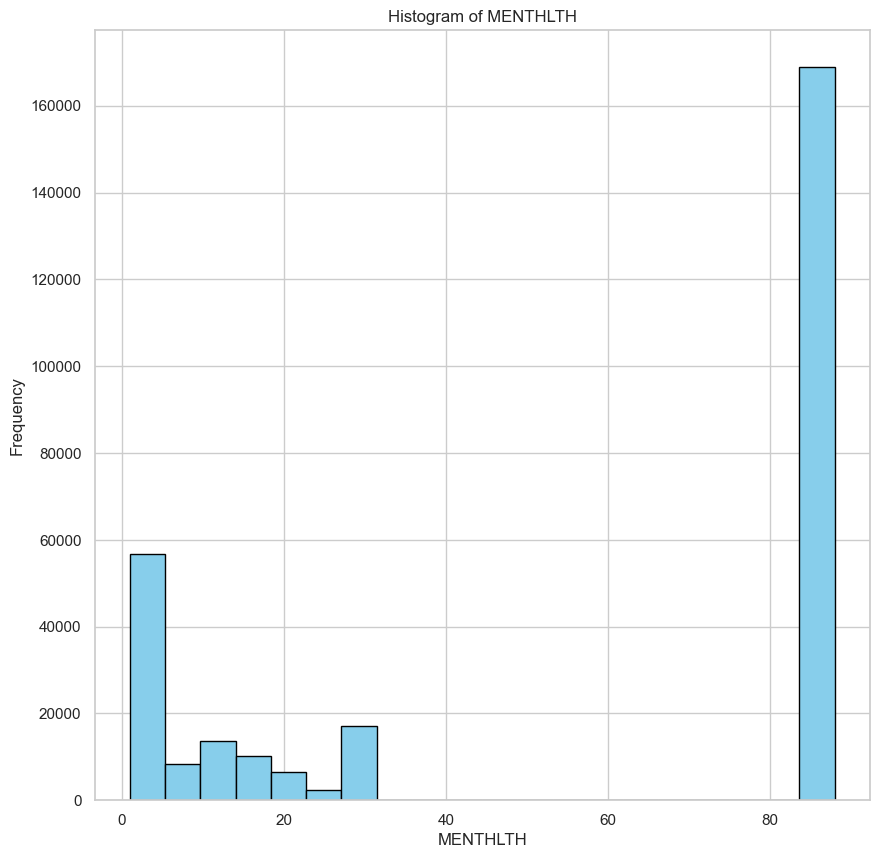

In [34]:
# Plotting Distributions for Mental health status

import matplotlib.pyplot as plt

column_name = 'MENTHLTH'

# Plot histogram
plt.figure(figsize=(10, 10))
plt.hist((df_clean[column_name]), bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of ' + column_name)
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

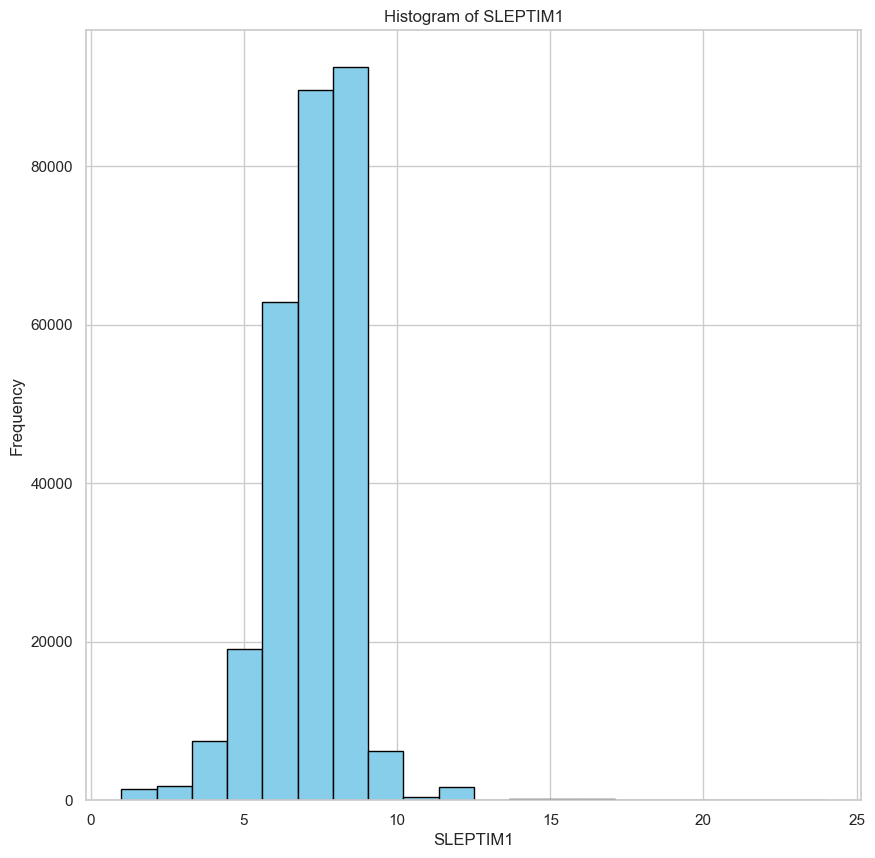

In [35]:
# Plotting Distributions for Sleep Time

import matplotlib.pyplot as plt

column_name = 'SLEPTIM1'

# Plot histogram
plt.figure(figsize=(10, 10))
plt.hist((df_clean[column_name]), bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of ' + column_name)
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [36]:
print('Raw counts: \n')
print(df_clean['SLEPTIM1'].value_counts())
print('-----------------------------------')
print('Normalized counts: \n')
print(df_clean['SLEPTIM1'].value_counts(normalize=True))

Raw counts: 

SLEPTIM1
7.0     89650
8.0     79028
6.0     62869
5.0     19109
9.0     13479
4.0      7520
10.0     6200
3.0      1841
12.0     1669
2.0       822
1.0       612
11.0      373
14.0      171
16.0      169
15.0      166
18.0       86
13.0       82
20.0       65
24.0       16
17.0       11
23.0        7
22.0        6
19.0        6
Name: count, dtype: int64
-----------------------------------
Normalized counts: 

SLEPTIM1
7.0     0.315717
8.0     0.278310
6.0     0.221403
5.0     0.067295
9.0     0.047468
4.0     0.026483
10.0    0.021834
3.0     0.006483
12.0    0.005878
2.0     0.002895
1.0     0.002155
11.0    0.001314
14.0    0.000602
16.0    0.000595
15.0    0.000585
18.0    0.000303
13.0    0.000289
20.0    0.000229
24.0    0.000056
17.0    0.000039
23.0    0.000025
22.0    0.000021
19.0    0.000021
Name: proportion, dtype: float64


_BMI5         1.000000
Obese         0.769040
Overweight    0.634927
GENHLTH       0.243657
_RFHLTH       0.158875
_TOTINDA      0.158094
EXERANY2      0.158094
_PHYS14D      0.119159
DRNKANY6      0.074908
_MENT14D      0.067989
_CHLDCNT      0.034026
_METSTAT      0.033902
_URBSTAT      0.027853
_IMPRACE      0.027661
_RACE1        0.019247
_RACEPR1      0.018081
_STATE        0.015689
_AGE_G        0.007718
ECIGNOW2      0.002610
_SMOKER3      0.002250
VETERAN3      0.001033
_SEX         -0.001319
_HLTHPLN     -0.004348
_AGE80       -0.012029
MARITAL      -0.012848
EMPLOY1      -0.015514
_AGEG5YR     -0.015816
_CURECI2     -0.017346
SMOKE100     -0.018673
_RFBING6     -0.022320
_HISPANC     -0.022656
USENOW3      -0.028575
PERSDOC3     -0.031587
_DRNKWK2     -0.036458
MENTHLTH     -0.038458
_MICHD       -0.043858
SLEPTIM1     -0.054900
DECIDE       -0.056581
CHECKUP1     -0.057030
_INCOMG1     -0.069933
_EDUCAG      -0.082682
PHYSHLTH     -0.089375
ADDEPEV3     -0.102280
_DRDXAR2   

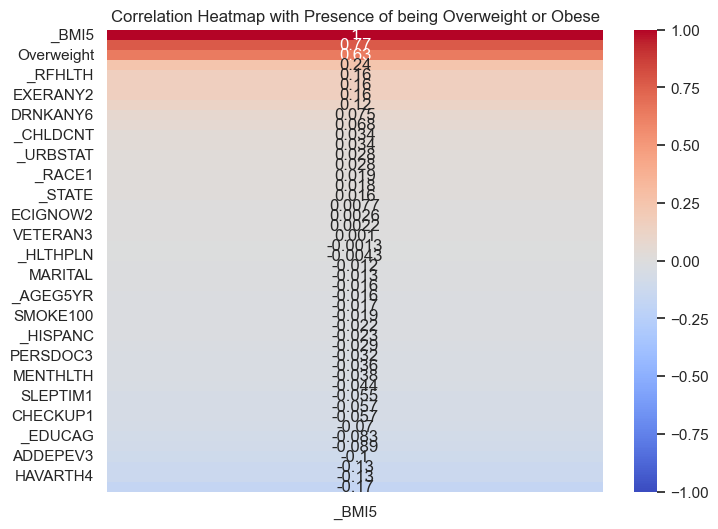

In [37]:
# Checking correlations between feature variables and BMI values 
print(df_clean.corr()["_BMI5"].sort_values(ascending = False))

# Heatmap showing correlations
plt.figure(figsize=(8, 6))
sns.heatmap(df_clean.corr()[['_BMI5']].sort_values(by='_BMI5', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap with Presence of being Overweight or Obese')
plt.show()


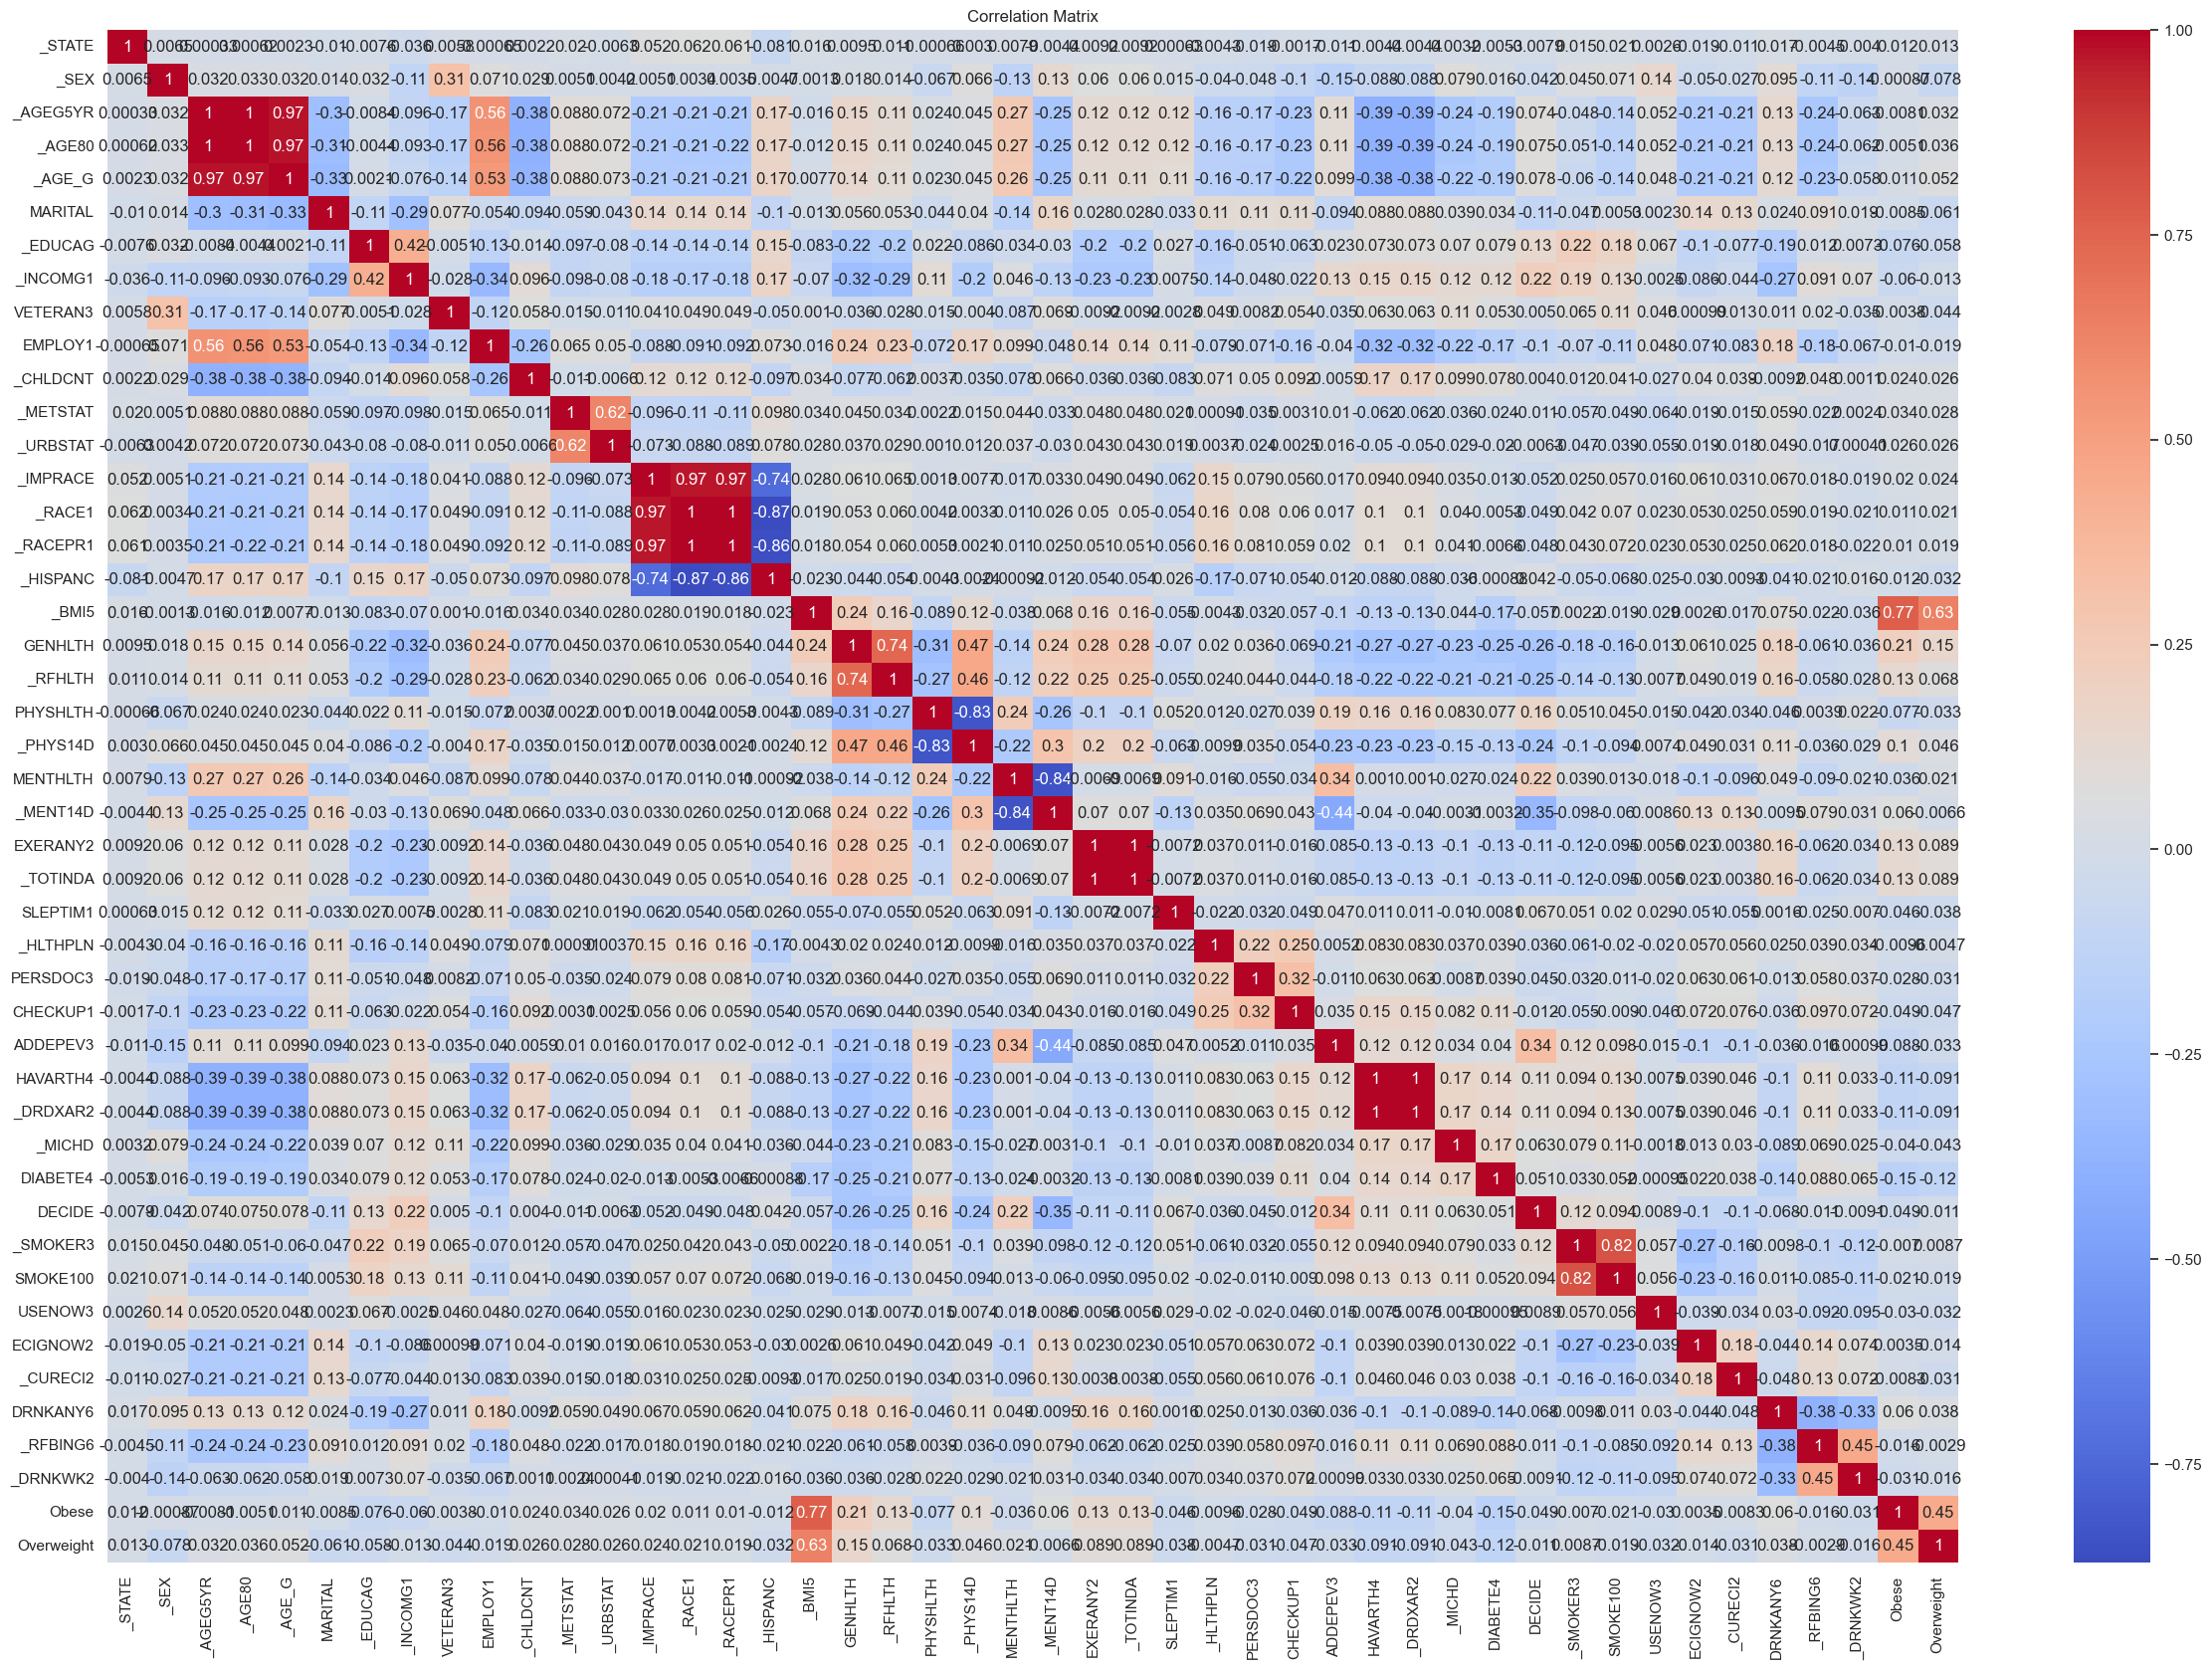

In [38]:
#Generating Correlation matrix
corr_matrix = df_clean.corr()
fig, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, ax=ax)
ax.set_title('Correlation Matrix')
plt.show()

Obese         1.000000
_BMI5         0.769040
Overweight    0.445627
GENHLTH       0.211882
_TOTINDA      0.130493
EXERANY2      0.130493
_RFHLTH       0.128058
_PHYS14D      0.099932
_MENT14D      0.060184
DRNKANY6      0.059879
_METSTAT      0.034015
_URBSTAT      0.026430
_CHLDCNT      0.024263
_IMPRACE      0.019801
_STATE        0.011523
_AGE_G        0.011378
_RACE1        0.011087
_RACEPR1      0.010173
ECIGNOW2      0.003459
_SEX         -0.000873
VETERAN3     -0.003792
_AGE80       -0.005133
_SMOKER3     -0.006986
_AGEG5YR     -0.008141
_CURECI2     -0.008279
MARITAL      -0.008527
_HLTHPLN     -0.009626
EMPLOY1      -0.010309
_HISPANC     -0.012149
_RFBING6     -0.016495
SMOKE100     -0.020834
PERSDOC3     -0.028284
USENOW3      -0.029675
_DRNKWK2     -0.031309
MENTHLTH     -0.036457
_MICHD       -0.040140
SLEPTIM1     -0.045898
DECIDE       -0.048565
CHECKUP1     -0.049302
_INCOMG1     -0.060092
_EDUCAG      -0.075583
PHYSHLTH     -0.076952
ADDEPEV3     -0.087789
_DRDXAR2   

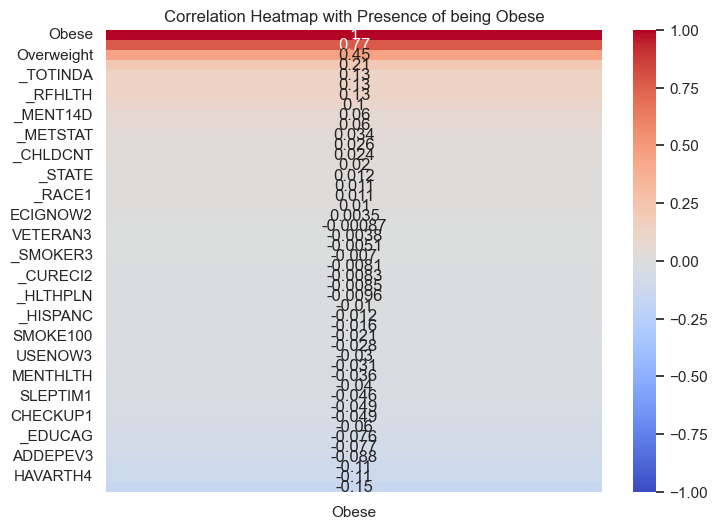

In [39]:
# Checking correlations between feature variables and BMI values 
print(df_clean.corr()["Obese"].sort_values(ascending = False))

# Heatmap showing correlations
plt.figure(figsize=(8, 6))
sns.heatmap(df_clean.corr()[['Obese']].sort_values(by='Obese', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap with Presence of being Obese')
plt.show()

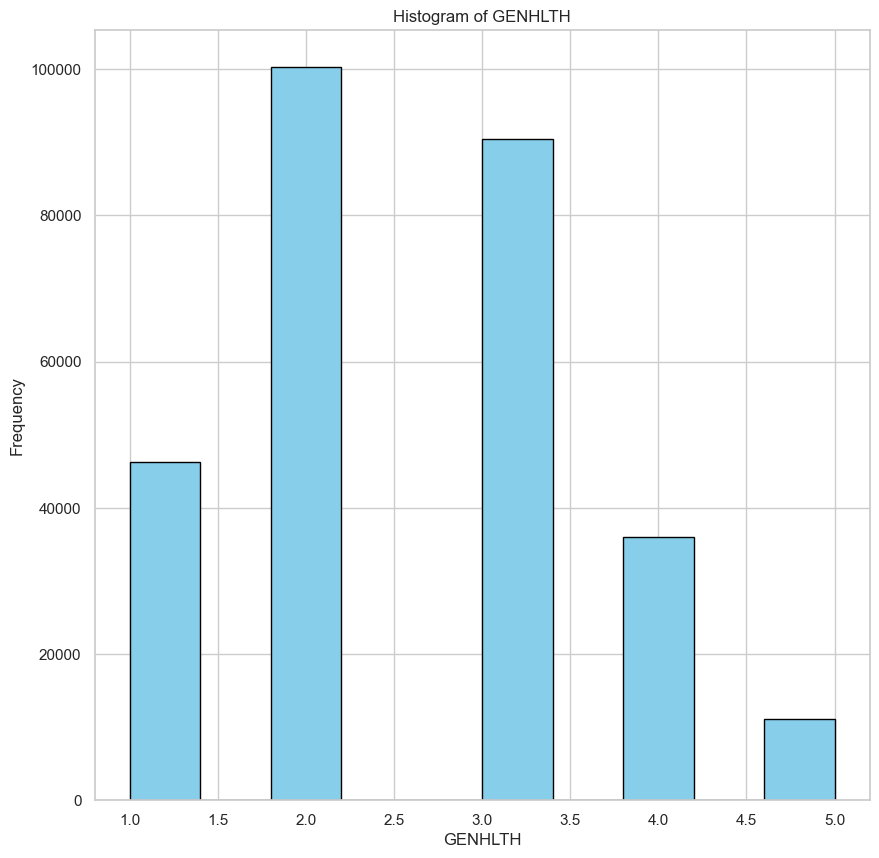

In [40]:
# Plotting Distributions for General Health

import matplotlib.pyplot as plt

column_name = 'GENHLTH'

# Plot histogram
plt.figure(figsize=(10, 10))
plt.hist((df_clean[column_name]), bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of ' + column_name)
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Looking at general health levels, most individuals tend to rank their health as either very good(2) or good (3).

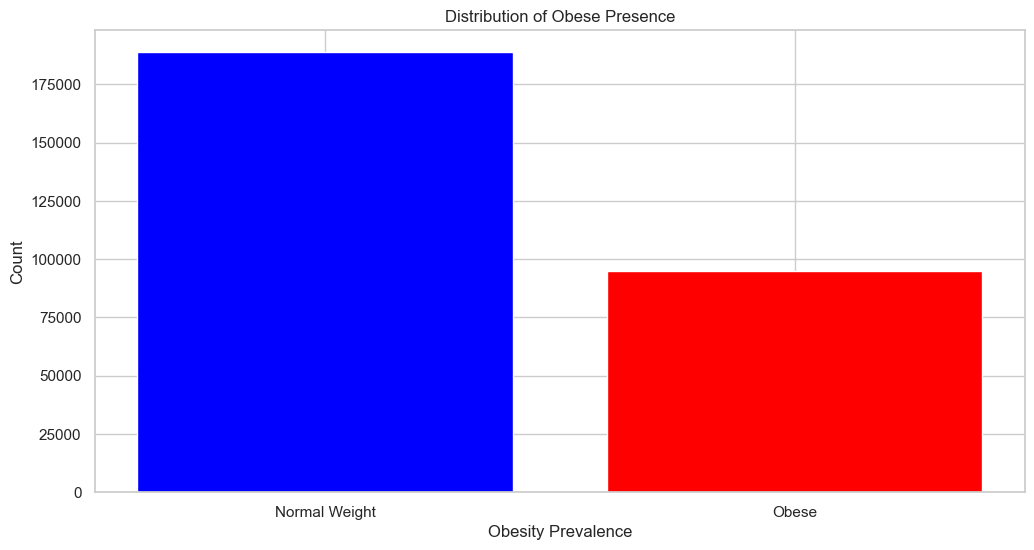

In [41]:
#Plotting visual for target variable

outcome_counts = df_clean['Obese'].value_counts()
plt.figure(figsize=(12, 6))
plt.bar(outcome_counts.index, outcome_counts.values, color=['blue', 'red'])
plt.xticks(outcome_counts.index, ['Normal Weight', 'Obese'])
plt.xlabel('Obesity Prevalence')
plt.ylabel('Count')
plt.title('Distribution of Obese Presence')
plt.show()

In [42]:
print('Raw counts: \n')
print(df_clean['Obese'].value_counts())
print('-----------------------------------')
print('Normalized counts: \n')
print(df_clean['Obese'].value_counts(normalize=True))

Raw counts: 

Obese
0    188841
1     95116
Name: count, dtype: int64
-----------------------------------
Normalized counts: 

Obese
0    0.665034
1    0.334966
Name: proportion, dtype: float64


Upon observation of the distribution, it does seem to be skewed to the right. The majority of values seem to be between BMI values of 20 to 40. To be classified as overweight BMI has to be 25.0 or over and to be classified as obese BMI has to be 30.0 or over. 

# Useful code for establishing a basic logreg model pipeline 

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separate features and target variable
# Also dropping overweight variable for modeling 
X = df_final.drop(['Obese', 'Overweight'], axis=1)
y = df_final[['Obese']]

# Define categorical and numerical columns
categorical_columns = ['_STATE', '_SEX', '_AGE_G', 'MARITAL', '_EDUCAG',
                       'EMPLOY1', '_INCOMG1', 'VETERAN3', '_CHLDCNT', 
                       '_METSTAT', '_URBSTAT', '_IMPRACE', 'GENHLTH', 
                       '_TOTINDA', '_HLTHPLN', 'PERSDOC3', 'CHECKUP1',
                       'ADDEPEV3', '_DRDXAR2', '_MICHD', 'DIABETE4', 
                       '_SMOKER3', '_CURECI2', 'DRNKANY6', '_RFBING6']
numerical_columns = ['MENTHLTH', 'PHYSHLTH', 'SLEPTIM1', 'BMI_adj']

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first'), categorical_columns)
    ])

# Define pipelines for logistic regression, decision trees, random forests, and neural networks
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform data using pipeline
X_preprocessed = pipeline.fit_transform(X)

# Modeling

## Basic Logistic Regression Model 

In [43]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Splitting Data into train and test groups 
# Separating target variable from predictors
X = df_clean.drop(['_BMI5', 'Overweight', 'Obese'], axis=1)  # Features
y = df_clean['Obese']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


# Define the pipeline
pipeline_logreg = Pipeline([
    ('scaler', StandardScaler()),  # Standard Scaler
    ('sampling', SMOTE()),  # Oversampling with SMOTE
    ('undersampling', RandomUnderSampler()),  # Undersampling the majority class
    ('model', LogisticRegression(random_state= 42))  # Logistic Regression model
])

# Fit the pipeline on the training data
pipeline_logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline_logreg.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.77      0.64      0.70     47086
           1       0.47      0.63      0.54     23904

    accuracy                           0.64     70990
   macro avg       0.62      0.64      0.62     70990
weighted avg       0.67      0.64      0.65     70990



In [44]:
# Creating function to take in model and data to generate evaluation score metrics
def model_scores(model, X_train, X_test, y_train, y_test):
    
    train_score = model.score(X_train, y_train)
    y_pred_train = model.predict(X_train)
    
    test_score = model.score(X_test, y_test)
    y_pred_test = model.predict(X_test)
    
  
    print("Model's Train Score:", train_score)
    print("Model's Test Score:", test_score)
    print("Cross Validation Scores:", cross_val_score(model, X_train, y_train))
    
    print("Model's Accuracy Score:", accuracy_score(y_test, y_pred_test))
    print("Model's Precision Score:", precision_score(y_test, y_pred_test))
    print("Model's F1 Score:", f1_score(y_test, y_pred_test))
    print("Model's Recall Score:", recall_score(y_test, y_pred_test))

In [45]:
# Generating baseline model scores 
model_scores(pipeline_logreg, X_train, X_test, y_train, y_test)

Model's Train Score: 0.6390661463982683
Model's Test Score: 0.6383293421608677
Cross Validation Scores: [0.63851716 0.63696765 0.64031648 0.6417956  0.63623131]
Model's Accuracy Score: 0.6383293421608677
Model's Precision Score: 0.4723047571388359
Model's F1 Score: 0.5405086171412209
Model's Recall Score: 0.6317352744310576


## Decision Tree Classifier Model

In [46]:
# Define the pipeline
pipeline_dt = Pipeline([
    ('scaler', StandardScaler()),  # Standard Scaler
    ('sampling', SMOTE()),  # Oversampling with SMOTE
    ('undersampling', RandomUnderSampler()),  # Undersampling the majority class
    ('model', DecisionTreeClassifier(random_state=42))  # Decision tree model
])

# Fit the pipeline on the training data
pipeline_dt.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline_dt.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.71      0.69      0.70     47086
           1       0.41      0.43      0.42     23904

    accuracy                           0.60     70990
   macro avg       0.56      0.56      0.56     70990
weighted avg       0.61      0.60      0.60     70990



In [47]:
# Generating model scores 
model_scores(pipeline_dt, X_train, X_test, y_train, y_test)

Model's Train Score: 0.9999906088736753
Model's Test Score: 0.6026200873362445
Cross Validation Scores: [0.60189229 0.60332441 0.59662386 0.60636724 0.60528725]
Model's Accuracy Score: 0.6026200873362445
Model's Precision Score: 0.4141957596046549
Model's F1 Score: 0.4242387133643563
Model's Recall Score: 0.43478078982597057


## K-Nearest Neighbors Model 

In [48]:
# Define the pipeline
pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),  # Standard Scaler
    ('sampling', SMOTE()),  # Oversampling with SMOTE
    ('undersampling', RandomUnderSampler()),  # Undersampling the majority class
    ('model', KNeighborsClassifier())  #  KNN model
])

# Fit the pipeline on the training data
pipeline_knn.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline_knn.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.73      0.55      0.63     47086
           1       0.41      0.60      0.48     23904

    accuracy                           0.57     70990
   macro avg       0.57      0.58      0.56     70990
weighted avg       0.62      0.57      0.58     70990



In [49]:
# Generating  model scores 
model_scores(pipeline_knn, X_train, X_test, y_train, y_test)

Model's Train Score: 0.7391520752041396
Model's Test Score: 0.568291308635019
Cross Validation Scores: [0.56658215 0.56827253 0.57042237 0.56903717 0.56481112]
Model's Accuracy Score: 0.568291308635019
Model's Precision Score: 0.40511102980495906
Model's F1 Score: 0.4843610667115337
Model's Recall Score: 0.6021586345381527


## Random Forest Classifier Model 

In [50]:
# Define the pipeline
pipeline_rfc = Pipeline([
    ('scaler', StandardScaler()),  # Standard Scaler
    ('sampling', SMOTE()),  # Oversampling with SMOTE
    ('undersampling', RandomUnderSampler()),  # Undersampling the majority class
    ('model', RandomForestClassifier(random_state=42))  #  Random Forest model
])

# Fit the pipeline on the training data
pipeline_rfc.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline_rfc.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.86      0.79     47086
           1       0.57      0.35      0.43     23904

    accuracy                           0.69     70990
   macro avg       0.64      0.61      0.61     70990
weighted avg       0.67      0.69      0.67     70990



In [51]:
# Generating model scores 
model_scores(pipeline_rfc, X_train, X_test, y_train, y_test)

Model's Train Score: 0.9999906088736753
Model's Test Score: 0.6904775320467671
Cross Validation Scores: [0.69251538 0.69246842 0.69051253 0.69302468 0.69210903]
Model's Accuracy Score: 0.6904775320467671
Model's Precision Score: 0.5658370269348789
Model's F1 Score: 0.43029375923669266
Model's Recall Score: 0.34713855421686746


# Hyperparameter Tuning 
## Baseline Model Tuning 

# Utilizing GridSearch to find best combination of parameters
# Define hyperparameter grid, looking at regularization strength, regularization type and solver options
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  
    'penalty': ['l1', 'l2'],  
    'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga'],
    'max_iter': [1, 2, 3, 4, 5]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(pipeline_logreg, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to data
grid_search.fit(X_train, y_train) 


# Print the best hyperparameters and corresponding score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Get the best estimator (model with the best hyperparameters)
best_log_reg = grid_search.best_estimator_

# Using tuned model for predictions
y_grid_pred = best_log_reg.predict(X_test) 

# Define the parameter grid with 'model__C' instead of 'C'
param_grid = {
    'model__C': [0.1, 1, 10, 100],  # Example values for 'C'
    'model__penalty': ['l1', 'l2'],  
    'model__solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga'],
    'model__max_iter': [1, 2, 3, 4, 5]
}

# Create GridSearchCV object
grid_search = GridSearchCV(pipeline_logreg, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters: ", grid_search.best_params_)


## Random Forest Grid Search Below

# Define the parameter grid with 'model__C' instead of 'C'
param_grid = {
    'model__n_estimators': [1, 2, 3, 4, 5],  # Number of decision trees
    'model__max_depth': [1, 2, 5, 10],  # Maximum depth of each tree
    'model__min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'model__min_samples_leaf': [1, 2, 4],  # Minimum samples required for a leaf node
    'model__bootstrap': [True, False]  # Whether to use bootstrap samples 
}

# Create GridSearchCV object
grid_search_rfc = GridSearchCV(pipeline_rfc, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to data
grid_search_rfc.fit(X_train, y_train)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters: ", grid_search_rfc.best_params_)


#Instantiate the model with tuned hyperparameters
tuned_baseline_model = LogisticRegression(random_state = 42, C = 1, penalty = 'l2',
                                          solver = 'liblinear', max_iter = 5 )

# Fit the model to the data
tb_model = tuned_baseline_model.fit(X_train_scaled, y_train_resample) 

# Making predictions 
y_base_tuned_pred= tuned_baseline_model.predict(X_test_scaled)

# Baseline test score 
tuned_baseline_score = tuned_baseline_model.score(X_test_scaled, y_test)

# Baseline test score 
tuned_baseline_train_score = tuned_baseline_model.score(X_train_scaled, y_train_resample)

# Cross Validation
tuned_baseline_cv = cross_val_score(tuned_baseline_model, X_train_scaled, y_train_resample)


print("Tuned Baseline Training Score:", tuned_baseline_train_score)
print("Tuned Baseline Test Score:", tuned_baseline_score)
print("Tuned Cross Validation Scores:", tuned_baseline_cv)

# Classification metrics for tuned baseline model
model_scores(tuned_baseline_model, X_train_scaled, X_test_scaled, y_train_resample, y_test)

## Random Forest Tuning 

# Define the parameter grid with 'model__C' instead of 'C'
param_grid = {
    'model__n_estimators': [1, 2, 3, 4, 5],  # Number of decision trees
    'model__max_depth': [1, 2, 5, 10],  # Maximum depth of each tree
    'model__min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'model__min_samples_leaf': [1, 2, 4],  # Minimum samples required for a leaf node
    'model__bootstrap': [True, False]  # Whether to use bootstrap samples 
}

# Create GridSearchCV object
grid_search_rfc = GridSearchCV(pipeline_rfc, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to data
grid_search_rfc.fit(X_train, y_train)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters: ", grid_search_rfc.best_params_)


# Utilizing GridSearch to find best combination of parameters for the Random Forest Model

param_grid = {
    'n_estimators': [1, 2, 3, 4, 5],  # Number of decision trees
    'max_depth': [1, 2, 5, 10],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required for a leaf node
    'bootstrap': [True, False]  # Whether to use bootstrap samples  
}

# Create a GridSearchCV object
rfc_grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to data
rfc_grid_search.fit(X_train_scaled, y_train_resample) 


# Print the best hyperparameters and corresponding score
print("Best Hyperparameters: ", rfc_grid_search.best_params_)
print("Best Score: ", rfc_grid_search.best_score_)

# Get the best estimator (model with the best hyperparameters)
best_rfc = rfc_grid_search.best_estimator_

# Using tuned model for predictions
y_rfc_grid_pred = best_rfc.predict(X_test_scaled)  

#Instantiate the model with tuned hyperparameters
tuned_rfc = RandomForestClassifier(random_state = 42, bootstrap = True, max_depth = 10, 
                                   min_samples_leaf = 2, min_samples_split = 10, n_estimators = 5)

# Fit the model to the data
tuned_rfc.fit(X_train_scaled, y_train_resample) 

# Making predictions 
y_rfc_tuned_pred= tuned_rfc.predict(X_test_scaled)

# Tuned test score 
tuned_rfc_test_score = tuned_rfc.score(X_test_scaled, y_test)

# Tuned train score 
tuned_rfc_train_score = tuned_rfc.score(X_train_scaled, y_train_resample)

# Cross Validation
tuned_rfc_cv = cross_val_score(tuned_rfc, X_train_scaled, y_train_resample)


print("Tuned Random Forest Training Score:", tuned_rfc_train_score)
print("Tuned Random Forest Test Score:", tuned_rfc_test_score)
print("Tuned Random Forest Cross Validation Scores:", tuned_rfc_cv)

# Classification metrics for best rfc model
model_scores(tuned_rfc, X_train_scaled, X_test_scaled, y_train_resample, y_test)

# Feature Importance and Confusion Matrix

## Feature Importances of Baseline Model 

_RACEPR1: 2.760982124847717
_RACE1: 1.418450627209222
_AGEG5YR: 1.3196648883692472
_IMPRACE: 0.9831086896964479
_AGE_G: 0.8104545142099815
GENHLTH: 0.5920239390745983
_HISPANC: 0.4018044532725332
_AGE80: 0.34319589818852314
_SMOKER3: 0.22395074157585765
_RFHLTH: 0.21111681239266183
DIABETE4: 0.2102214150190229
EMPLOY1: 0.15924956725591805
SMOKE100: 0.12215739495613805
HAVARTH4: 0.09389598640547162
_DRDXAR2: 0.09389598640547162
_PHYS14D: 0.09359502348652977
EXERANY2: 0.08920316486372767
_TOTINDA: 0.08920316486372767
CHECKUP1: 0.0871709773886903
ADDEPEV3: 0.08097292858211536
PERSDOC3: 0.07873763345681684
_DRNKWK2: 0.07618259883977188
PHYSHLTH: 0.06966623908776762
_EDUCAG: 0.06832091038674677
SLEPTIM1: 0.05165752469576505
DECIDE: 0.042548501335950055
USENOW3: 0.03843902041816541
MENTHLTH: 0.037033631198021964
MARITAL: 0.03698647952942074
_SEX: 0.036818793826593345
_CURECI2: 0.0335138043250426
DRNKANY6: 0.03338179086135268
_CHLDCNT: 0.029481221647706862
_RFBING6: 0.028726822981218134
ECIGN

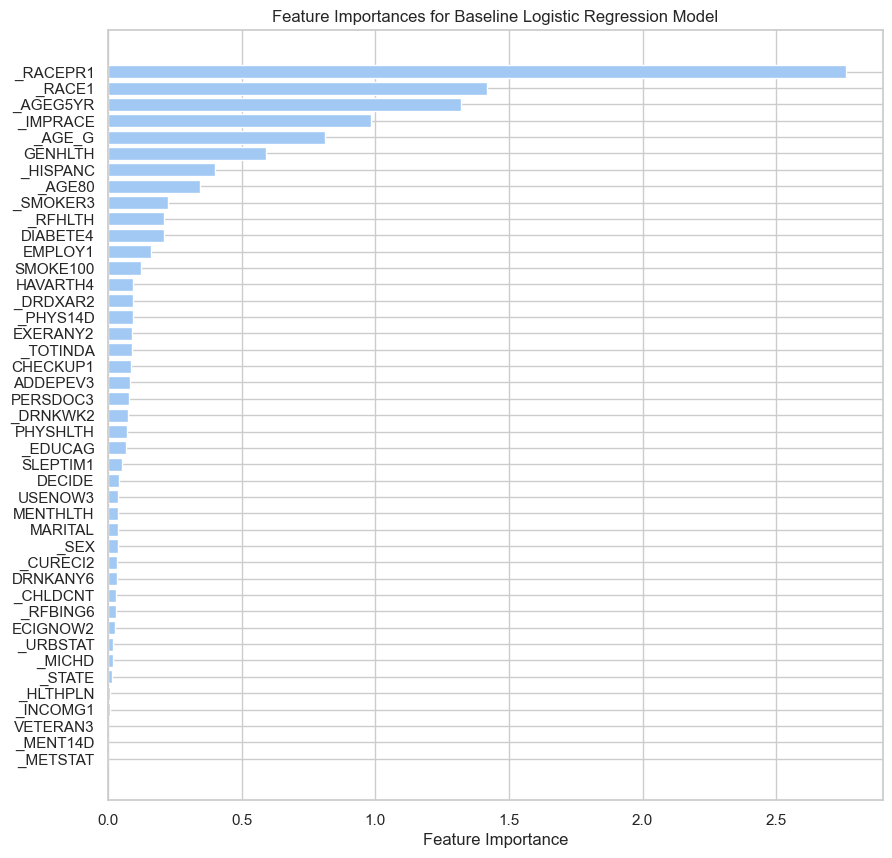

In [60]:
# Get the LogisticRegression model from the pipeline
logreg_model = pipeline_logreg.named_steps['model']

# Access the coefficients of the LogisticRegression model
coef = logreg_model.coef_[0]

# Calculating the feature importances by taking the absolute values of the coefficients
feature_importances = abs(coef)

# Getting the feature names 
feature_names = ['_STATE', '_SEX', '_AGEG5YR', '_AGE80', '_AGE_G', 'MARITAL','_EDUCAG', '_INCOMG1', 
            'VETERAN3', 'EMPLOY1', '_CHLDCNT', '_METSTAT', '_URBSTAT', '_IMPRACE', '_RACE1', '_RACEPR1', '_HISPANC', 
                #Health Status/ Metrics------------------------------------------------------------------------------------
            'GENHLTH', '_RFHLTH','PHYSHLTH', '_PHYS14D',
            'MENTHLTH', '_MENT14D', 'EXERANY2', '_TOTINDA', 'SLEPTIM1', 
            '_HLTHPLN', 'PERSDOC3', 'CHECKUP1', 'ADDEPEV3', 'HAVARTH4', '_DRDXAR2', '_MICHD',  
            'DIABETE4', 'DECIDE',  
                #Tobacco use-----------------------------------------------------------------------------------------------
            '_SMOKER3','SMOKE100', 'USENOW3', 'ECIGNOW2', '_CURECI2', 
                #Alcohol consumption---------------------------------------------------------------------------------------
            'DRNKANY6', '_RFBING6', '_DRNKWK2']

# Creating a list of (feature_name, importance) pairs
feature_importance_pairs = list(zip(feature_names, feature_importances))

# Sorting the feature importances by importance in descending order
feature_importance_pairs.sort(key=lambda x: x[1], reverse=True)

# Printting feature importances
for feature, importance in feature_importance_pairs:
    print(f"{feature}: {importance}")

# Plotting feature importances 
plt.figure(figsize=(10, 10))
plt.barh([feature for feature, importance in feature_importance_pairs], 
         [importance for feature, importance in feature_importance_pairs])
plt.xlabel('Feature Importance')
plt.title('Feature Importances for Baseline Logistic Regression Model')
plt.gca().invert_yaxis() 
plt.show()

from sklearn.inspection import permutation_importance

# Get the LogisticRegression model from the pipeline
knn_model = pipeline_knn.named_steps['model']

# Calculate permutation importance
result = permutation_importance(knn_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Get the feature importances
feature_importances = result.importances_mean


# Getting the feature names 
feature_names = ['_STATE', '_SEX', '_AGEG5YR', '_AGE80', '_AGE_G', 'MARITAL','_EDUCAG', '_INCOMG1', 
            'VETERAN3', 'EMPLOY1', '_CHLDCNT', '_METSTAT', '_URBSTAT', '_IMPRACE', '_RACE1', '_RACEPR1', '_HISPANC', 
                #Health Status/ Metrics------------------------------------------------------------------------------------
            'GENHLTH', '_RFHLTH','PHYSHLTH', '_PHYS14D',
            'MENTHLTH', '_MENT14D', 'EXERANY2', '_TOTINDA', 'SLEPTIM1', 
            '_HLTHPLN', 'PERSDOC3', 'CHECKUP1', 'ADDEPEV3', 'HAVARTH4', '_DRDXAR2', '_MICHD',  
            'DIABETE4', 'DECIDE',  
                #Tobacco use-----------------------------------------------------------------------------------------------
            '_SMOKER3','SMOKE100', 'USENOW3', 'ECIGNOW2', '_CURECI2', 
                #Alcohol consumption---------------------------------------------------------------------------------------
            'DRNKANY6', '_RFBING6', '_DRNKWK2']

# Creating a list of (feature_name, importance) pairs
feature_importance_pairs = list(zip(feature_names, feature_importances))

# Sorting the feature importances by importance in descending order
feature_importance_pairs.sort(key=lambda x: x[1], reverse=True)

# Printting feature importances
for feature, importance in feature_importance_pairs:
    print(f"{feature}: {importance}")

# Plotting feature importances 
plt.figure(figsize=(10, 10))
plt.barh([feature for feature, importance in feature_importance_pairs], 
         [importance for feature, importance in feature_importance_pairs])
plt.xlabel('Feature Importance')
plt.title('Feature Importances for RFC Model')
plt.gca().invert_yaxis() 
plt.show()

GENHLTH: 0.09830229048515436
_STATE: 0.07300151947322277
_AGE80: 0.07163654615760129
SLEPTIM1: 0.060821409366793915
_AGEG5YR: 0.052328813483914265
_EDUCAG: 0.05135187766646995
_INCOMG1: 0.05079859394680553
_DRNKWK2: 0.04621597747960757
MARITAL: 0.02992926097866576
_AGE_G: 0.029219380341391314
MENTHLTH: 0.02911300317722828
PHYSHLTH: 0.028682892773397386
EMPLOY1: 0.02804405462308295
PERSDOC3: 0.025685855613737353
DIABETE4: 0.02444461757753247
_CHLDCNT: 0.022237437205216377
_SMOKER3: 0.020910772550901475
CHECKUP1: 0.020049185797402003
_SEX: 0.016260224770752653
_MENT14D: 0.01564887471559995
_PHYS14D: 0.015528886061542338
ECIGNOW2: 0.013944112683518686
_METSTAT: 0.013304981970424002
DRNKANY6: 0.012169784570329299
_RACEPR1: 0.012008197140252778
_IMPRACE: 0.011954598460248768
_RACE1: 0.011839694245810382
ADDEPEV3: 0.011431174071481672
SMOKE100: 0.010737287668944826
VETERAN3: 0.009199205038589823
_URBSTAT: 0.00863851952126469
_TOTINDA: 0.008288984520063021
HAVARTH4: 0.008165745447097418
_RFHL

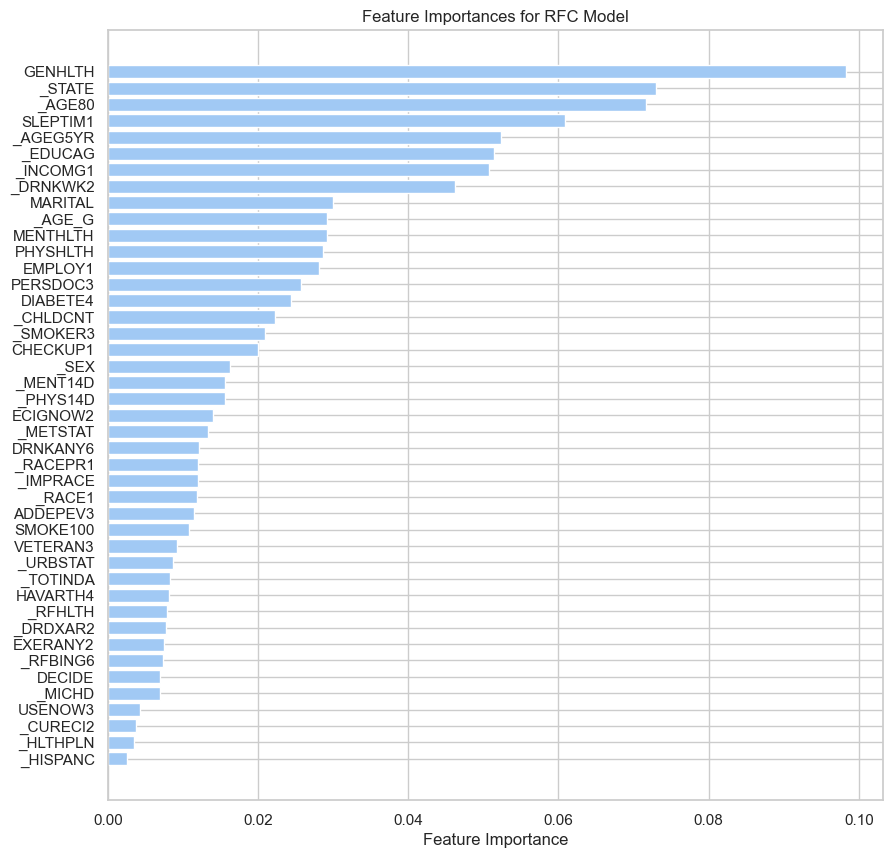

In [70]:
# Get the rfc model from the pipeline
rfc_model = pipeline_rfc.named_steps['model']

# Access the feature importances
feature_importances = rfc_model.feature_importances_

# Getting the feature names 
feature_names = ['_STATE', '_SEX', '_AGEG5YR', '_AGE80', '_AGE_G', 'MARITAL','_EDUCAG', '_INCOMG1', 
            'VETERAN3', 'EMPLOY1', '_CHLDCNT', '_METSTAT', '_URBSTAT', '_IMPRACE', '_RACE1', '_RACEPR1', '_HISPANC', 
                #Health Status/ Metrics------------------------------------------------------------------------------------
            'GENHLTH', '_RFHLTH','PHYSHLTH', '_PHYS14D',
            'MENTHLTH', '_MENT14D', 'EXERANY2', '_TOTINDA', 'SLEPTIM1', 
            '_HLTHPLN', 'PERSDOC3', 'CHECKUP1', 'ADDEPEV3', 'HAVARTH4', '_DRDXAR2', '_MICHD',  
            'DIABETE4', 'DECIDE',  
                #Tobacco use-----------------------------------------------------------------------------------------------
            '_SMOKER3','SMOKE100', 'USENOW3', 'ECIGNOW2', '_CURECI2', 
                #Alcohol consumption---------------------------------------------------------------------------------------
            'DRNKANY6', '_RFBING6', '_DRNKWK2']

# Creating a list of (feature_name, importance) pairs
feature_importance_pairs = list(zip(feature_names, feature_importances))

# Sorting the feature importances by importance in descending order
feature_importance_pairs.sort(key=lambda x: x[1], reverse=True)

# Printting feature importances
for feature, importance in feature_importance_pairs:
    print(f"{feature}: {importance}")

# Plotting feature importances 
plt.figure(figsize=(10, 10))
plt.barh([feature for feature, importance in feature_importance_pairs], 
         [importance for feature, importance in feature_importance_pairs])
plt.xlabel('Feature Importance')
plt.title('Feature Importances for RFC Model')
plt.gca().invert_yaxis() 
plt.show()

In [116]:
# Filter feature_importance_pairs to include only features with importances greater than 0.01
filtered_features = [(feature, importance) for feature, importance in feature_importance_pairs if importance > 0.01]

# Extract feature names from filtered features
filtered_feature_names = [feature for feature, _ in filtered_features]

# Append "Obese" column to the list of filtered feature names
filtered_feature_names.append("Obese")

# Filter the DataFrame df_clean to include only the selected features
df_filtered = df_clean[filtered_feature_names]

# Display the first few rows of the filtered DataFrame
print(df_filtered.head())

   GENHLTH  _STATE  _AGE80  SLEPTIM1  _AGEG5YR  _EDUCAG  _INCOMG1  \
1      1.0     1.0    80.0       6.0      13.0      2.0       3.0   
2      2.0     1.0    56.0       5.0       8.0      4.0       6.0   
4      4.0     1.0    43.0       9.0       5.0      3.0       3.0   
6      2.0     1.0    80.0       7.0      13.0      4.0       5.0   
7      3.0     1.0    80.0       8.0      13.0      2.0       5.0   

       _DRNKWK2  MARITAL  _AGE_G  MENTHLTH  PHYSHLTH  EMPLOY1  PERSDOC3  \
1  5.397605e-79      3.0     6.0      88.0      88.0      2.0       2.0   
2  5.397605e-79      1.0     5.0       3.0       2.0      7.0       1.0   
4  1.400000e+02      1.0     3.0      88.0       2.0      5.0       2.0   
6  2.330000e+02      2.0     6.0      88.0      88.0      7.0       1.0   
7  5.397605e-79      3.0     6.0      88.0      88.0      7.0       1.0   

   DIABETE4  _CHLDCNT  _SMOKER3  CHECKUP1  _SEX  _MENT14D  _PHYS14D  ECIGNOW2  \
1       3.0       1.0       4.0       8.0   2.0      

In [117]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283957 entries, 1 to 445130
Data columns (total 30 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   GENHLTH   283957 non-null  float64
 1   _STATE    283957 non-null  float64
 2   _AGE80    283957 non-null  float64
 3   SLEPTIM1  283957 non-null  float64
 4   _AGEG5YR  283957 non-null  float64
 5   _EDUCAG   283957 non-null  float64
 6   _INCOMG1  283957 non-null  float64
 7   _DRNKWK2  283957 non-null  float64
 8   MARITAL   283957 non-null  float64
 9   _AGE_G    283957 non-null  float64
 10  MENTHLTH  283957 non-null  float64
 11  PHYSHLTH  283957 non-null  float64
 12  EMPLOY1   283957 non-null  float64
 13  PERSDOC3  283957 non-null  float64
 14  DIABETE4  283957 non-null  float64
 15  _CHLDCNT  283957 non-null  float64
 16  _SMOKER3  283957 non-null  float64
 17  CHECKUP1  283957 non-null  float64
 18  _SEX      283957 non-null  float64
 19  _MENT14D  283957 non-null  float64
 20  _PHYS14D 

In [118]:
# Splitting new df into train and test groups 
# Separating target variable from predictors
X2 = df_filtered.drop(['Obese'], axis=1)  # Features
y2 = df_filtered['Obese']  # Target variable
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.25, random_state=42)



# Neural Network Modeling 

In [100]:
from sklearn.model_selection import train_test_split

# Set the seed for reproducibility
np.random.seed(42)

# Define the percentage of the original training set to use
percentage_to_use = 0.25 

# Split the original training set into a smaller subset
sample_train_X, _, sample_train_y, _ = train_test_split(
    X_train, y_train, 
    train_size= percentage_to_use, 
    stratify= y_train,  # Maintain class distribution
    random_state=42   # Set random seed for reproducibility
)

# Print the shape of the new subset
print("Sample Train X Shape:", sample_train_X.shape)
print("Sample Train Y Shape:", sample_train_y.shape)

Sample Train X Shape: (53241, 43)
Sample Train Y Shape: (53241,)


In [107]:
# Define a function to plot training and validation curves
def plot_curves(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train'], loc='upper left')
    plt.show()

# Define a function to get evaluation metrics
def get_evaluation_metrics(model):

    # Evaluate the model 
    test_evaluation_results = model.evaluate(X_test, y_test)
    train_evaluation_results = model.evaluate(sample_train_X, sample_train_y)

    # Print all evaluation results
    print("Test Evaluation Results:", test_evaluation_results)
    print("Train Evaluation Results:", train_evaluation_results)

    # Access specific values
    test_loss = test_evaluation_results[0]
    test_acc = test_evaluation_results[1]
    test_f1 = test_evaluation_results[2]
    train_loss = train_evaluation_results[0]
    train_acc = train_evaluation_results[1]
    train_f1 = train_evaluation_results[2]


    # Print specific values
    print("Test Loss:", test_loss)
    print("Test Accuracy:", test_acc)
    print("Test F1 Score:", test_f1)
    print("Train Loss:", train_loss)
    print("Train Accuracy:", train_acc)
    print("Train F1 Score:", train_f1)

In [104]:
# Baseline NN with 120 epochs, batch_size 250

# Number of input features
n_features = sample_train_X.shape[1]

# Define a custom F1 score metric function using TensorFlow operations
def f1_metric(y_true, y_pred):
    y_pred = tf.round(y_pred)
    true_positives = tf.reduce_sum(tf.cast(y_true * y_pred, 'float'), axis=0)
    possible_positives = tf.reduce_sum(tf.cast(y_true, 'float'), axis=0)
    predicted_positives = tf.reduce_sum(tf.cast(y_pred, 'float'), axis=0)
    precision = true_positives / (predicted_positives + tf.keras.backend.epsilon())
    recall = true_positives / (possible_positives + tf.keras.backend.epsilon())
    f1 = 2 * (precision * recall) / (precision + recall + tf.keras.backend.epsilon())
    return tf.reduce_mean(f1)

# Initialize a sequential model
model = models.Sequential()

# Two layers with relu activation
model.add(layers.Dense(50, activation='relu', input_shape=(n_features,)))
model.add(layers.Dense(25, activation='relu'))

# One layer with sigmoid activation 
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy', f1_metric])

# Train the model 
history = model.fit(sample_train_X,
                    sample_train_y,
                    epochs=120,
                    batch_size=250)

# Evaluate the model 
get_evaluation_metrics(model)

Epoch 1/120
213/213 [==============================] - 2s 2ms/step - loss: 0.9119 - accuracy: 0.6141 - f1_metric: 0.2476
Epoch 2/120
213/213 [==============================] - 1s 2ms/step - loss: 0.6902 - accuracy: 0.6467 - f1_metric: 0.2233
Epoch 3/120
213/213 [==============================] - 0s 2ms/step - loss: 0.6757 - accuracy: 0.6551 - f1_metric: 0.2497
Epoch 4/120
213/213 [==============================] - 1s 3ms/step - loss: 0.6473 - accuracy: 0.6654 - f1_metric: 0.2638
Epoch 5/120
213/213 [==============================] - 1s 3ms/step - loss: 0.7013 - accuracy: 0.6575 - f1_metric: 0.2776
Epoch 6/120
213/213 [==============================] - 1s 3ms/step - loss: 0.6298 - accuracy: 0.6709 - f1_metric: 0.2971
Epoch 7/120
213/213 [==============================] - 1s 2ms/step - loss: 0.6749 - accuracy: 0.6691 - f1_metric: 0.3170
Epoch 8/120
213/213 [==============================] - 1s 2ms/step - loss: 0.6558 - accuracy: 0.6697 - f1_metric: 0.3207
Epoch 9/120
213/213 [===========

In [105]:
# Baseline NN but with additionml dense layer of 50

# Initialize a sequential model
model2 = models.Sequential()

# Two layers with relu activation
model2.add(layers.Dense(50, activation='relu', input_shape=(n_features,)))
model2.add(layers.Dense(50, activation='relu'))
model2.add(layers.Dense(25, activation='relu'))

# One layer with sigmoid activation 
model2.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model2.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy', f1_metric])

# Train the model 
history2 = model2.fit(sample_train_X,
                    sample_train_y,
                    epochs=120,
                    batch_size=250)

Epoch 1/120
213/213 [==============================] - 2s 3ms/step - loss: 0.8514 - accuracy: 0.6236 - f1_metric: 0.2045
Epoch 2/120
213/213 [==============================] - 1s 3ms/step - loss: 0.7014 - accuracy: 0.6492 - f1_metric: 0.1821
Epoch 3/120
213/213 [==============================] - 1s 3ms/step - loss: 0.6629 - accuracy: 0.6591 - f1_metric: 0.1821
Epoch 4/120
213/213 [==============================] - 1s 3ms/step - loss: 0.6775 - accuracy: 0.6579 - f1_metric: 0.2073
Epoch 5/120
213/213 [==============================] - 1s 3ms/step - loss: 0.6571 - accuracy: 0.6634 - f1_metric: 0.2258
Epoch 6/120
213/213 [==============================] - 1s 3ms/step - loss: 0.6564 - accuracy: 0.6635 - f1_metric: 0.2448
Epoch 7/120
213/213 [==============================] - 1s 3ms/step - loss: 0.6359 - accuracy: 0.6717 - f1_metric: 0.2661
Epoch 8/120
213/213 [==============================] - 1s 3ms/step - loss: 0.6284 - accuracy: 0.6734 - f1_metric: 0.2805
Epoch 9/120
213/213 [===========

In [108]:
# Evaluate the model 
get_evaluation_metrics(model2)

1664/1664 [==============================] - 4s 2ms/step - loss: 0.5624 - accuracy: 0.7084 - f1_metric: 0.4251
Test Evaluation Results: [0.6027646660804749, 0.6807860136032104, 0.3787582814693451]
Train Evaluation Results: [0.5624340176582336, 0.7084202170372009, 0.42509037256240845]
Test Loss: 0.6027646660804749
Test Accuracy: 0.6807860136032104
Test F1 Score: 0.3787582814693451
Train Loss: 0.5624340176582336
Train Accuracy: 0.7084202170372009
Train F1 Score: 0.42509037256240845


In [110]:
# Model 3
# Adjusting model 2 by balancing class weights to account for class imbalance with obesity 

from sklearn.utils.class_weight import compute_class_weight

# Balancing class weights to account for class imbalance

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: w for i, w in enumerate(class_weights)}

# Initialize a sequential model
model3 = models.Sequential()

# Two layers with relu activation
model3.add(layers.Dense(50, activation='relu', input_shape=(n_features,)))
model3.add(layers.Dense(50, activation='relu'))
model3.add(layers.Dense(25, activation='relu'))

# One layer with sigmoid activation 
model3.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model3.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy', f1_metric])

# Train the model 
history3 = model3.fit(sample_train_X,
                    sample_train_y,
                    epochs=120,
                    batch_size=250, 
                    class_weight=class_weights_dict )

# Evaluate the model 
get_evaluation_metrics(model3)

Epoch 1/120
213/213 [==============================] - 2s 3ms/step - loss: 1.1593 - accuracy: 0.5215 - f1_metric: 0.4200
Epoch 2/120
213/213 [==============================] - 1s 3ms/step - loss: 0.7910 - accuracy: 0.5383 - f1_metric: 0.4481
Epoch 3/120
213/213 [==============================] - 1s 3ms/step - loss: 0.7706 - accuracy: 0.5557 - f1_metric: 0.4603
Epoch 4/120
213/213 [==============================] - 1s 3ms/step - loss: 0.8014 - accuracy: 0.5619 - f1_metric: 0.4602
Epoch 5/120
213/213 [==============================] - 1s 3ms/step - loss: 0.7216 - accuracy: 0.5777 - f1_metric: 0.4797
Epoch 6/120
213/213 [==============================] - 1s 3ms/step - loss: 0.6860 - accuracy: 0.5978 - f1_metric: 0.4952
Epoch 7/120
213/213 [==============================] - 1s 3ms/step - loss: 0.7029 - accuracy: 0.5970 - f1_metric: 0.4944
Epoch 8/120
213/213 [==============================] - 1s 2ms/step - loss: 0.6841 - accuracy: 0.6031 - f1_metric: 0.5019
Epoch 9/120
213/213 [===========

# Filtered to keep feature importances greater than 0.01 from RFC model 

In [119]:
# Splitting new df into train and test groups 
# Separating target variable from predictors
X2 = df_filtered.drop(['Obese'], axis=1)  # Features
y2 = df_filtered['Obese']  # Target variable
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.25, random_state=42)


In [120]:
# Set the seed for reproducibility
np.random.seed(42)

# Define the percentage of the original training set to use
percentage_to_use = 0.25 

# Split the original training set into a smaller subset
sample_train_X2, _, sample_train_y2, _ = train_test_split(
    X_train2, y_train2, 
    train_size= percentage_to_use, 
    stratify= y_train2,  # Maintain class distribution
    random_state=42   # Set random seed for reproducibility
)

# Print the shape of the new subset
print("Sample Train X Shape:", sample_train_X2.shape)
print("Sample Train Y Shape:", sample_train_y2.shape)

Sample Train X Shape: (53241, 29)
Sample Train Y Shape: (53241,)


In [123]:
# Define a function to get evaluation metrics
def get_evaluation_metrics_general(model, X_test, y_test, sample_train_X, sample_train_y):

    # Evaluate the model 
    test_evaluation_results = model.evaluate(X_test, y_test)
    train_evaluation_results = model.evaluate(sample_train_X, sample_train_y)

    # Print all evaluation results
    print("Test Evaluation Results:", test_evaluation_results)
    print("Train Evaluation Results:", train_evaluation_results)

    # Access specific values
    test_loss = test_evaluation_results[0]
    test_acc = test_evaluation_results[1]
    test_f1 = test_evaluation_results[2]
    train_loss = train_evaluation_results[0]
    train_acc = train_evaluation_results[1]
    train_f1 = train_evaluation_results[2]


    # Print specific values
    print("Test Loss:", test_loss)
    print("Test Accuracy:", test_acc)
    print("Test F1 Score:", test_f1)
    print("Train Loss:", train_loss)
    print("Train Accuracy:", train_acc)
    print("Train F1 Score:", train_f1)

In [124]:
# Define a function to get evaluation metrics
def get_evaluation_metrics2(model):

    # Evaluate the model 
    test_evaluation_results = model.evaluate(X_test2, y_test2)
    train_evaluation_results = model.evaluate(sample_train_X2, sample_train_y2)

    # Print all evaluation results
    print("Test Evaluation Results:", test_evaluation_results)
    print("Train Evaluation Results:", train_evaluation_results)

    # Access specific values
    test_loss = test_evaluation_results[0]
    test_acc = test_evaluation_results[1]
    test_f1 = test_evaluation_results[2]
    train_loss = train_evaluation_results[0]
    train_acc = train_evaluation_results[1]
    train_f1 = train_evaluation_results[2]


    # Print specific values
    print("Test Loss:", test_loss)
    print("Test Accuracy:", test_acc)
    print("Test F1 Score:", test_f1)
    print("Train Loss:", train_loss)
    print("Train Accuracy:", train_acc)
    print("Train F1 Score:", train_f1)

In [125]:
# Baseline NN with 120 epochs, batch_size 250 with new filtered dataset

# Number of input features
n_features = sample_train_X2.shape[1]

# Initialize a sequential model
reduced_model = models.Sequential()

# Two layers with relu activation
reduced_model.add(layers.Dense(50, activation='relu', input_shape=(n_features,)))
reduced_model.add(layers.Dense(25, activation='relu'))

# One layer with sigmoid activation 
reduced_model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
reduced_model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy', f1_metric])

# Train the model 
history_r1 = reduced_model.fit(sample_train_X2,
                    sample_train_y2,
                    epochs=120,
                    batch_size=250)

# Evaluate the model 
get_evaluation_metrics2(reduced_model)

Epoch 1/120
213/213 [==============================] - 1s 2ms/step - loss: 0.9064 - accuracy: 0.6076 - f1_metric: 0.2501
Epoch 2/120
213/213 [==============================] - 1s 3ms/step - loss: 0.6827 - accuracy: 0.6364 - f1_metric: 0.2208
Epoch 3/120
213/213 [==============================] - 1s 2ms/step - loss: 0.6847 - accuracy: 0.6470 - f1_metric: 0.2328
Epoch 4/120
213/213 [==============================] - 1s 2ms/step - loss: 0.6979 - accuracy: 0.6488 - f1_metric: 0.2528
Epoch 5/120
213/213 [==============================] - 0s 2ms/step - loss: 0.6782 - accuracy: 0.6534 - f1_metric: 0.2648
Epoch 6/120
213/213 [==============================] - 1s 3ms/step - loss: 0.6611 - accuracy: 0.6576 - f1_metric: 0.2740
Epoch 7/120
213/213 [==============================] - 1s 3ms/step - loss: 0.6634 - accuracy: 0.6566 - f1_metric: 0.2828
Epoch 8/120
213/213 [==============================] - 1s 3ms/step - loss: 0.6377 - accuracy: 0.6670 - f1_metric: 0.2943
Epoch 9/120
213/213 [===========

In [126]:
# Baseline NN but with additionml dense layer of 50 on new filetered dataset
# Number of input features
n_features = sample_train_X2.shape[1]

# Initialize a sequential model
reduced_model2 = models.Sequential()

# Two layers with relu activation
reduced_model2.add(layers.Dense(50, activation='relu', input_shape=(n_features,)))
reduced_model2.add(layers.Dense(50, activation='relu'))
reduced_model2.add(layers.Dense(25, activation='relu'))

# One layer with sigmoid activation 
reduced_model2.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
reduced_model2.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy', f1_metric])

# Train the model 
history_r2 = reduced_model2.fit(sample_train_X2,
                    sample_train_y2,
                    epochs=120,
                    batch_size=250)

# Evaluate the model 
get_evaluation_metrics2(reduced_model2)

Epoch 1/120
213/213 [==============================] - 2s 4ms/step - loss: 1.5953 - accuracy: 0.6244 - f1_metric: 0.1818
Epoch 2/120
213/213 [==============================] - 1s 3ms/step - loss: 0.6419 - accuracy: 0.6583 - f1_metric: 0.1190
Epoch 3/120
213/213 [==============================] - 1s 3ms/step - loss: 0.6441 - accuracy: 0.6604 - f1_metric: 0.1488
Epoch 4/120
213/213 [==============================] - 1s 3ms/step - loss: 0.6278 - accuracy: 0.6653 - f1_metric: 0.1822
Epoch 5/120
213/213 [==============================] - 1s 3ms/step - loss: 0.6255 - accuracy: 0.6693 - f1_metric: 0.2167
Epoch 6/120
213/213 [==============================] - 1s 3ms/step - loss: 0.6265 - accuracy: 0.6697 - f1_metric: 0.2337
Epoch 7/120
213/213 [==============================] - 1s 3ms/step - loss: 0.6202 - accuracy: 0.6718 - f1_metric: 0.2567
Epoch 8/120
213/213 [==============================] - 1s 3ms/step - loss: 0.6202 - accuracy: 0.6705 - f1_metric: 0.2639
Epoch 9/120
213/213 [===========

In [127]:
# Baseline NN but with additionml dense layer of 50 on new filetered dataset
# Also additional of class weights computation


# Number of input features
n_features = sample_train_X2.shape[1]

# Balancing class weights to account for class imbalance

class_weights = compute_class_weight('balanced', classes=np.unique(y_train2), y=y_train2)
class_weights_dict = {i: w for i, w in enumerate(class_weights)}

# Initialize a sequential model
reduced_model3 = models.Sequential()

# Two layers with relu activation
reduced_model3.add(layers.Dense(50, activation='relu', input_shape=(n_features,)))
reduced_model3.add(layers.Dense(50, activation='relu'))
reduced_model2.add(layers.Dense(25, activation='relu'))

# One layer with sigmoid activation 
reduced_model3.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
reduced_model3.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy', f1_metric])

# Train the model 
history_r3 = reduced_model3.fit(sample_train_X2,
                    sample_train_y2,
                    epochs=120,
                    batch_size=250, 
                    class_weight=class_weights_dict)

# Evaluate the model 
get_evaluation_metrics2(reduced_model3)

Epoch 1/120
213/213 [==============================] - 1s 2ms/step - loss: 0.9600 - accuracy: 0.5089 - f1_metric: 0.4091
Epoch 2/120
213/213 [==============================] - 0s 2ms/step - loss: 0.8267 - accuracy: 0.5361 - f1_metric: 0.4378
Epoch 3/120
213/213 [==============================] - 1s 2ms/step - loss: 0.8308 - accuracy: 0.5490 - f1_metric: 0.4576
Epoch 4/120
213/213 [==============================] - 1s 3ms/step - loss: 0.7841 - accuracy: 0.5598 - f1_metric: 0.4663
Epoch 5/120
213/213 [==============================] - 0s 2ms/step - loss: 0.7912 - accuracy: 0.5739 - f1_metric: 0.4802
Epoch 6/120
213/213 [==============================] - 0s 2ms/step - loss: 0.8082 - accuracy: 0.5770 - f1_metric: 0.4769
Epoch 7/120
213/213 [==============================] - 0s 2ms/step - loss: 0.8110 - accuracy: 0.5774 - f1_metric: 0.4746
Epoch 8/120
213/213 [==============================] - 1s 2ms/step - loss: 0.7438 - accuracy: 0.5881 - f1_metric: 0.4908
Epoch 9/120
213/213 [===========

In [ ]:
# Baseline NN but with additionml dense layer of 50 on new filetered dataset
# Also additional of class weights computation


# Number of input features
n_features = sample_train_X2.shape[1]

# Balancing class weights to account for class imbalance

class_weights = compute_class_weight('balanced', classes=np.unique(y_train2), y=y_train2)
class_weights_dict = {i: w for i, w in enumerate(class_weights)}

# Initialize a sequential model
reduced_model3 = models.Sequential()

# Two layers with relu activation
reduced_model3.add(layers.Dense(50, activation='relu', input_shape=(n_features,)))
reduced_model3.add(layers.Dense(50, activation='relu'))
reduced_model2.add(layers.Dense(25, activation='relu'))

# One layer with sigmoid activation 
reduced_model3.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
reduced_model3.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy', f1_metric])

# Train the model 
history_r3 = reduced_model3.fit(sample_train_X2,
                    sample_train_y2,
                    epochs=120,
                    batch_size=250, 
                    class_weight=class_weights_dict)

# Evaluate the model 
get_evaluation_metrics2(reduced_model3)

# NN with standard scaling

In [131]:
# Splitting new df into train and test groups 
# Separating target variable from predictors
X3 = df_filtered.drop(['Obese'], axis=1)  # Features
y3 = df_filtered['Obese']  # Target variable
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.25, random_state=42)

In [132]:
# Set the seed for reproducibility
np.random.seed(42)

# Define the percentage of the original training set to use
percentage_to_use = 0.25 

# Split the original training set into a smaller subset
sample_train_X3, _, sample_train_y3, _ = train_test_split(
    X_train3, y_train3, 
    train_size= percentage_to_use, 
    stratify= y_train3,  # Maintain class distribution
    random_state=42   # Set random seed for reproducibility
)

# Print the shape of the new subset
print("Sample Train X Shape:", sample_train_X3.shape)
print("Sample Train Y Shape:", sample_train_y3.shape)

Sample Train X Shape: (53241, 29)
Sample Train Y Shape: (53241,)


In [133]:
# Instantiate StandardScaler
ss_X = StandardScaler()

# Fit and transform the training data
sample_X_train3_scaled = ss_X.fit_transform(sample_train_X3)
X_train3_scaled = ss_X.fit_transform(X_train3)

# Transform test data
X_test3_scaled = ss_X.transform(X_test3)

In [134]:
# Define a function to get evaluation metrics
def get_evaluation_metrics3(model):

    # Evaluate the model 
    test_evaluation_results = model.evaluate(X_test3_scaled, y_test3)
    train_evaluation_results = model.evaluate(X_train3_scaled, y_train3)

    # Print all evaluation results
    print("Test Evaluation Results:", test_evaluation_results)
    print("Train Evaluation Results:", train_evaluation_results)

    # Access specific values
    test_loss = test_evaluation_results[0]
    test_acc = test_evaluation_results[1]
    test_f1 = test_evaluation_results[2]
    train_loss = train_evaluation_results[0]
    train_acc = train_evaluation_results[1]
    train_f1 = train_evaluation_results[2]


    # Print specific values
    print("Test Loss:", test_loss)
    print("Test Accuracy:", test_acc)
    print("Test F1 Score:", test_f1)
    print("Train Loss:", train_loss)
    print("Train Accuracy:", train_acc)
    print("Train F1 Score:", train_f1)

In [135]:
# Baseline NN with 120 epochs, batch_size 250 with new filtered dataset

# Number of input features
n_features = sample_train_X3.shape[1]

# Initialize a sequential model
scaled_model = models.Sequential()

# Two layers with relu activation
scaled_model.add(layers.Dense(50, activation='relu', input_shape=(n_features,)))
scaled_model.add(layers.Dense(25, activation='relu'))

# One layer with sigmoid activation 
scaled_model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
scaled_model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy', f1_metric])

# Train the model 
history_s1 = scaled_model.fit(sample_X_train3_scaled,
                    sample_train_y3,
                    epochs=120,
                    batch_size=250)

# Evaluate the model 
get_evaluation_metrics3(scaled_model)

Epoch 1/120
213/213 [==============================] - 1s 2ms/step - loss: 0.6240 - accuracy: 0.6571 - f1_metric: 0.2538
Epoch 2/120
213/213 [==============================] - 1s 2ms/step - loss: 0.5922 - accuracy: 0.6848 - f1_metric: 0.3124
Epoch 3/120
213/213 [==============================] - 1s 3ms/step - loss: 0.5871 - accuracy: 0.6888 - f1_metric: 0.3440
Epoch 4/120
213/213 [==============================] - 1s 3ms/step - loss: 0.5841 - accuracy: 0.6913 - f1_metric: 0.3587
Epoch 5/120
213/213 [==============================] - 0s 2ms/step - loss: 0.5818 - accuracy: 0.6937 - f1_metric: 0.3718
Epoch 6/120
213/213 [==============================] - 1s 2ms/step - loss: 0.5807 - accuracy: 0.6940 - f1_metric: 0.3732
Epoch 7/120
213/213 [==============================] - 1s 2ms/step - loss: 0.5786 - accuracy: 0.6961 - f1_metric: 0.3872
Epoch 8/120
213/213 [==============================] - 1s 2ms/step - loss: 0.5777 - accuracy: 0.6970 - f1_metric: 0.3900
Epoch 9/120
213/213 [===========

In [136]:
# Baseline NN with 120 epochs, batch_size 250 with new filtered dataset
# Scaled data
# Adding additional dense layer of 50

# Number of input features
n_features = sample_train_X3.shape[1]

# Initialize a sequential model
scaled_model2 = models.Sequential()

# Two layers with relu activation
scaled_model2.add(layers.Dense(50, activation='relu', input_shape=(n_features,)))
scaled_model2.add(layers.Dense(50, activation='relu'))
scaled_model2.add(layers.Dense(25, activation='relu'))

# One layer with sigmoid activation 
scaled_model2.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
scaled_model2.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy', f1_metric])

# Train the model 
history_s2 = scaled_model2.fit(sample_X_train3_scaled,
                    sample_train_y3,
                    epochs=120,
                    batch_size=250)

# Evaluate the model 
get_evaluation_metrics3(scaled_model2)

Epoch 1/120
213/213 [==============================] - 2s 2ms/step - loss: 0.6050 - accuracy: 0.6774 - f1_metric: 0.2588
Epoch 2/120
213/213 [==============================] - 1s 2ms/step - loss: 0.5899 - accuracy: 0.6874 - f1_metric: 0.3431
Epoch 3/120
213/213 [==============================] - 1s 3ms/step - loss: 0.5856 - accuracy: 0.6904 - f1_metric: 0.3625
Epoch 4/120
213/213 [==============================] - 1s 2ms/step - loss: 0.5824 - accuracy: 0.6932 - f1_metric: 0.3723
Epoch 5/120
213/213 [==============================] - 1s 2ms/step - loss: 0.5807 - accuracy: 0.6931 - f1_metric: 0.3754
Epoch 6/120
213/213 [==============================] - 1s 3ms/step - loss: 0.5781 - accuracy: 0.6963 - f1_metric: 0.3876
Epoch 7/120
213/213 [==============================] - 1s 2ms/step - loss: 0.5766 - accuracy: 0.6971 - f1_metric: 0.3913
Epoch 8/120
213/213 [==============================] - 1s 2ms/step - loss: 0.5747 - accuracy: 0.6984 - f1_metric: 0.4004
Epoch 9/120
213/213 [===========

In [137]:
# Baseline NN with 120 epochs, batch_size 250 with new filtered dataset
# Scaled data
# Adding additional dense layer of 50

# Number of input features
n_features = sample_train_X3.shape[1]

# Balancing class weights to account for class imbalance

class_weights = compute_class_weight('balanced', classes=np.unique(y_train3), y=y_train3)
class_weights_dict = {i: w for i, w in enumerate(class_weights)}

# Initialize a sequential model
scaled_model3 = models.Sequential()

# Two layers with relu activation
scaled_model3.add(layers.Dense(50, activation='relu', input_shape=(n_features,)))
scaled_model3.add(layers.Dense(50, activation='relu'))
scaled_model3.add(layers.Dense(25, activation='relu'))

# One layer with sigmoid activation 
scaled_model3.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
scaled_model3.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy', f1_metric])

# Train the model 
history_s3 = scaled_model3.fit(sample_X_train3_scaled,
                    sample_train_y3,
                    epochs=120,
                    batch_size=250, 
                    class_weight=class_weights_dict)

# Evaluate the model 
get_evaluation_metrics3(scaled_model3)

Epoch 1/120
213/213 [==============================] - 2s 3ms/step - loss: 0.6564 - accuracy: 0.6096 - f1_metric: 0.5091
Epoch 2/120
213/213 [==============================] - 1s 3ms/step - loss: 0.6401 - accuracy: 0.6313 - f1_metric: 0.5346
Epoch 3/120
213/213 [==============================] - 1s 3ms/step - loss: 0.6343 - accuracy: 0.6378 - f1_metric: 0.5436
Epoch 4/120
213/213 [==============================] - 1s 3ms/step - loss: 0.6303 - accuracy: 0.6408 - f1_metric: 0.5479
Epoch 5/120
213/213 [==============================] - 1s 3ms/step - loss: 0.6280 - accuracy: 0.6429 - f1_metric: 0.5503
Epoch 6/120
213/213 [==============================] - 1s 3ms/step - loss: 0.6254 - accuracy: 0.6450 - f1_metric: 0.5525
Epoch 7/120
213/213 [==============================] - 1s 3ms/step - loss: 0.6241 - accuracy: 0.6471 - f1_metric: 0.5553
Epoch 8/120
213/213 [==============================] - 1s 3ms/step - loss: 0.6223 - accuracy: 0.6482 - f1_metric: 0.5562
Epoch 9/120
213/213 [===========

In [ ]:
# Baseline NN with 120 epochs, batch_size 250 with new filtered dataset
# Scaled data
# Adding additional dense layer of 50

# Number of input features
n_features = sample_train_X3.shape[1]

# Balancing class weights to account for class imbalance

class_weights = compute_class_weight('balanced', classes=np.unique(y_train3), y=y_train3)
class_weights_dict = {i: w for i, w in enumerate(class_weights)}

# Initialize a sequential model
scaled_model3 = models.Sequential()

# Two layers with relu activation
scaled_model3.add(layers.Dense(50, activation='relu', input_shape=(n_features,)))
scaled_model3.add(layers.Dense(50, activation='relu'))
scaled_model3.add(layers.Dense(25, activation='relu'))

# One layer with sigmoid activation 
scaled_model3.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
scaled_model3.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy', f1_metric])

# Train the model 
history_s3 = scaled_model3.fit(sample_X_train3_scaled,
                    sample_train_y3,
                    epochs=120,
                    batch_size=100, 
                    class_weight=class_weights_dict)

# Evaluate the model 
get_evaluation_metrics3(scaled_model3)

In [138]:
# Adding drop out layers

# Initialize a sequential model
scaled_model3 = models.Sequential()

# Add dropout layers after each dense layer
scaled_model3.add(layers.Dense(50, activation='relu', input_shape=(n_features,)))
scaled_model3.add(layers.Dropout(0.2))  # Adjust dropout rate as needed
scaled_model3.add(layers.Dense(50, activation='relu'))
scaled_model3.add(layers.Dropout(0.2))  # Adjust dropout rate as needed
scaled_model3.add(layers.Dense(25, activation='relu'))
scaled_model3.add(layers.Dropout(0.2))  # Adjust dropout rate as needed

# Output layer
scaled_model3.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
scaled_model3.compile(optimizer='Adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', f1_metric])

# Train the model 
history_s3 = scaled_model3.fit(sample_X_train3_scaled,
                    sample_train_y3,
                    epochs=120,
                    batch_size=100, 
                    class_weight=class_weights_dict)

# Evaluate the model 
get_evaluation_metrics3(scaled_model3)

Epoch 1/120
533/533 [==============================] - 7s 7ms/step - loss: 0.6710 - accuracy: 0.5803 - f1_metric: 0.4834
Epoch 2/120
533/533 [==============================] - 3s 5ms/step - loss: 0.6538 - accuracy: 0.6126 - f1_metric: 0.5147
Epoch 3/120
533/533 [==============================] - 4s 7ms/step - loss: 0.6475 - accuracy: 0.6175 - f1_metric: 0.5243
Epoch 4/120
533/533 [==============================] - 3s 6ms/step - loss: 0.6450 - accuracy: 0.6253 - f1_metric: 0.5283
Epoch 5/120
533/533 [==============================] - 3s 5ms/step - loss: 0.6425 - accuracy: 0.6270 - f1_metric: 0.5316
Epoch 6/120
533/533 [==============================] - 3s 6ms/step - loss: 0.6406 - accuracy: 0.6296 - f1_metric: 0.5331
Epoch 7/120
533/533 [==============================] - 2s 4ms/step - loss: 0.6393 - accuracy: 0.6314 - f1_metric: 0.5341
Epoch 8/120
533/533 [==============================] - 3s 6ms/step - loss: 0.6386 - accuracy: 0.6328 - f1_metric: 0.5391
Epoch 9/120
533/533 [===========

In [140]:
from tensorflow.keras import optimizers



# Baseline NN with 120 epochs, batch_size 100 with new filtered dataset
# Scaled data
# Adding additional dense layer of 50
# adjustign learning rate

# Number of input features
n_features = sample_train_X3.shape[1]

# Balancing class weights to account for class imbalance

class_weights = compute_class_weight('balanced', classes=np.unique(y_train3), y=y_train3)
class_weights_dict = {i: w for i, w in enumerate(class_weights)}

# Initialize a sequential model
scaled_model3 = models.Sequential()

# Add dropout layers after each dense layer
scaled_model3.add(layers.Dense(50, activation='relu', input_shape=(n_features,)))
scaled_model3.add(layers.Dropout(0.2))  # Adjust dropout rate as needed
scaled_model3.add(layers.Dense(50, activation='relu'))
scaled_model3.add(layers.Dropout(0.2))  # Adjust dropout rate as needed
scaled_model3.add(layers.Dense(25, activation='relu'))
scaled_model3.add(layers.Dropout(0.2))  # Adjust dropout rate as needed
# One layer with sigmoid activation 
scaled_model3.add(layers.Dense(1, activation='sigmoid'))

# Compile the model with a custom optimizer with a lower learning rate
custom_optimizer = optimizers.Adam(lr=0.0001) 
scaled_model3.compile(optimizer=custom_optimizer,
                      loss='binary_crossentropy',
                      metrics=['accuracy', f1_metric])

# Train the model 
history_s3 = scaled_model3.fit(sample_X_train3_scaled,
                    sample_train_y3,
                    epochs=120,
                    batch_size=100, 
                    class_weight=class_weights_dict)

# Evaluate the model 
get_evaluation_metrics3(scaled_model3)

Epoch 1/120
533/533 [==============================] - 3s 3ms/step - loss: 0.6741 - accuracy: 0.5938 - f1_metric: 0.4694
Epoch 2/120
533/533 [==============================] - 2s 3ms/step - loss: 0.6538 - accuracy: 0.6055 - f1_metric: 0.5160
Epoch 3/120
533/533 [==============================] - 1s 3ms/step - loss: 0.6477 - accuracy: 0.6120 - f1_metric: 0.5283
Epoch 4/120
533/533 [==============================] - 1s 3ms/step - loss: 0.6448 - accuracy: 0.6258 - f1_metric: 0.5287
Epoch 5/120
533/533 [==============================] - 1s 3ms/step - loss: 0.6435 - accuracy: 0.6229 - f1_metric: 0.5317
Epoch 6/120
533/533 [==============================] - 1s 3ms/step - loss: 0.6424 - accuracy: 0.6241 - f1_metric: 0.5337
Epoch 7/120
533/533 [==============================] - 1s 3ms/step - loss: 0.6413 - accuracy: 0.6277 - f1_metric: 0.5358
Epoch 8/120
533/533 [==============================] - 1s 2ms/step - loss: 0.6381 - accuracy: 0.6296 - f1_metric: 0.5394
Epoch 9/120
533/533 [===========

In [141]:
# Baseline NN with 120 epochs, batch_size 100 with new filtered dataset
# Scaled data
# Adding additional dense layer of 50
# SGD optmizer

# Number of input features
n_features = sample_train_X3.shape[1]

# Balancing class weights to account for class imbalance

class_weights = compute_class_weight('balanced', classes=np.unique(y_train3), y=y_train3)
class_weights_dict = {i: w for i, w in enumerate(class_weights)}

# Initialize a sequential model
scaled_model3 = models.Sequential()

# Add dropout layers after each dense layer
scaled_model3.add(layers.Dense(50, activation='relu', input_shape=(n_features,)))
scaled_model3.add(layers.Dropout(0.2))  # Adjust dropout rate as needed
scaled_model3.add(layers.Dense(50, activation='relu'))
scaled_model3.add(layers.Dropout(0.2))  # Adjust dropout rate as needed
scaled_model3.add(layers.Dense(25, activation='relu'))
scaled_model3.add(layers.Dropout(0.2))  # Adjust dropout rate as needed
# One layer with sigmoid activation 
scaled_model3.add(layers.Dense(1, activation='sigmoid'))

# Compile the model with SGD optimizer
scaled_model3.compile(optimizer= 'SGD',
                      loss='binary_crossentropy',
                      metrics=['accuracy', f1_metric])

# Train the model 
history_s3 = scaled_model3.fit(sample_X_train3_scaled,
                    sample_train_y3,
                    epochs=120,
                    batch_size=100, 
                    class_weight=class_weights_dict)

# Evaluate the model 
get_evaluation_metrics3(scaled_model3)

Epoch 1/120
533/533 [==============================] - 2s 3ms/step - loss: 0.7032 - accuracy: 0.5022 - f1_metric: 0.4316
Epoch 2/120
533/533 [==============================] - 1s 2ms/step - loss: 0.6862 - accuracy: 0.5621 - f1_metric: 0.4445
Epoch 3/120
533/533 [==============================] - 1s 3ms/step - loss: 0.6804 - accuracy: 0.5798 - f1_metric: 0.4517
Epoch 4/120
533/533 [==============================] - 2s 3ms/step - loss: 0.6745 - accuracy: 0.5905 - f1_metric: 0.4632
Epoch 5/120
533/533 [==============================] - 1s 2ms/step - loss: 0.6723 - accuracy: 0.5969 - f1_metric: 0.4696
Epoch 6/120
533/533 [==============================] - 1s 2ms/step - loss: 0.6693 - accuracy: 0.5969 - f1_metric: 0.4782
Epoch 7/120
533/533 [==============================] - 1s 3ms/step - loss: 0.6672 - accuracy: 0.6039 - f1_metric: 0.4825
Epoch 8/120
533/533 [==============================] - 1s 2ms/step - loss: 0.6659 - accuracy: 0.6027 - f1_metric: 0.4917
Epoch 9/120
533/533 [===========

In [142]:
# Baseline NN with 120 epochs, batch_size 100 with new filtered dataset
# Adding additional dense layer of 50
# SGD optimizer with no x scaled train data in training model, only x train sampled

# Number of input features
n_features = sample_train_X3.shape[1]

# Balancing class weights to account for class imbalance

class_weights = compute_class_weight('balanced', classes=np.unique(y_train3), y=y_train3)
class_weights_dict = {i: w for i, w in enumerate(class_weights)}

# Initialize a sequential model
scaled_model3 = models.Sequential()

# Add dropout layers after each dense layer
scaled_model3.add(layers.Dense(50, activation='relu', input_shape=(n_features,)))
scaled_model3.add(layers.Dropout(0.2))  # Adjust dropout rate as needed
scaled_model3.add(layers.Dense(50, activation='relu'))
scaled_model3.add(layers.Dropout(0.2))  # Adjust dropout rate as needed
scaled_model3.add(layers.Dense(25, activation='relu'))
scaled_model3.add(layers.Dropout(0.2))  # Adjust dropout rate as needed
# One layer with sigmoid activation 
scaled_model3.add(layers.Dense(1, activation='sigmoid'))

# Compile the model with SGD optimizer
scaled_model3.compile(optimizer= 'SGD',
                      loss='binary_crossentropy',
                      metrics=['accuracy', f1_metric])

# Train the model 
history_s3 = scaled_model3.fit(sample_train_X3,
                    sample_train_y3,
                    epochs=120,
                    batch_size=100, 
                    class_weight=class_weights_dict)

# Evaluate the model 
get_evaluation_metrics3(scaled_model3)

Epoch 1/120
533/533 [==============================] - 2s 2ms/step - loss: 0.8648 - accuracy: 0.5078 - f1_metric: 0.4094
Epoch 2/120
533/533 [==============================] - 1s 3ms/step - loss: 0.6942 - accuracy: 0.5478 - f1_metric: 0.3974
Epoch 3/120
533/533 [==============================] - 1s 2ms/step - loss: 0.6915 - accuracy: 0.5842 - f1_metric: 0.3735
Epoch 4/120
533/533 [==============================] - 1s 3ms/step - loss: 0.6914 - accuracy: 0.5839 - f1_metric: 0.3783
Epoch 5/120
533/533 [==============================] - 2s 3ms/step - loss: 0.6906 - accuracy: 0.5950 - f1_metric: 0.3720
Epoch 6/120
533/533 [==============================] - 2s 3ms/step - loss: 0.6914 - accuracy: 0.5939 - f1_metric: 0.3670
Epoch 7/120
533/533 [==============================] - 1s 3ms/step - loss: 0.6907 - accuracy: 0.5898 - f1_metric: 0.3721
Epoch 8/120
533/533 [==============================] - 2s 3ms/step - loss: 0.6903 - accuracy: 0.5919 - f1_metric: 0.3717
Epoch 9/120
533/533 [===========